In [37]:
# reading the TexNet catalog and do simple visualization, working on to see if there is an increase in the earthquake activity in the region
# author - Kaushik Pradhan (kpradhan@miners.utep.edu)
# Last modified - 02/19/2024

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from mpl_toolkits.basemap import Basemap

In [39]:
#reading the texnet_catalog.csv file
texNet_df = pd.read_csv('texnet_events.csv')
print(texNet_df.head())

          EventID Evaluation Status Origin Date Origin Time  Local Magnitude  \
0  texnet2024dikg             final  2024-02-17    06:52:16              3.3   
1  texnet2024dijs             final  2024-02-17    06:34:18              3.7   
2  texnet2024dijp             final  2024-02-17    06:32:54              4.7   
3  texnet2024dijf             final  2024-02-17    06:20:21              4.4   
4  texnet2024diek         Automatic  2024-02-17    03:53:14              1.5   

   Moment Magnitude  Latitude (WGS84)  Latitude Error (km)  Longitude (WGS84)  \
0               NaN           28.9719                  1.0           -97.9650   
1               NaN           28.9627                  1.7           -97.9360   
2               NaN           28.9581                  0.6           -98.0053   
3               NaN           28.9545                  0.5           -98.0053   
4               NaN           31.6708                  1.5          -104.4363   

   Longitude Error (km)  ...  No

In [40]:
# give the statistics of the data
print(texNet_df.describe())

       Local Magnitude  Moment Magnitude  Latitude (WGS84)  \
count     24822.000000         46.000000      24822.000000   
mean          1.848606          3.886957         31.552585   
std           0.608922          0.436964          0.778395   
min          -1.000000          3.200000         28.225700   
25%           1.500000          3.700000         31.406500   
50%           1.900000          3.800000         31.641900   
75%           2.200000          3.975000         31.698775   
max           5.400000          5.300000         36.263100   

       Latitude Error (km)  Longitude (WGS84)  Longitude Error (km)  \
count         24822.000000       24822.000000          24822.000000   
mean              0.813001        -103.237675              0.749295   
std               1.652299           1.741507              1.250060   
min               0.200000        -106.003600              0.100000   
25%               0.600000        -104.300275              0.500000   
50%            

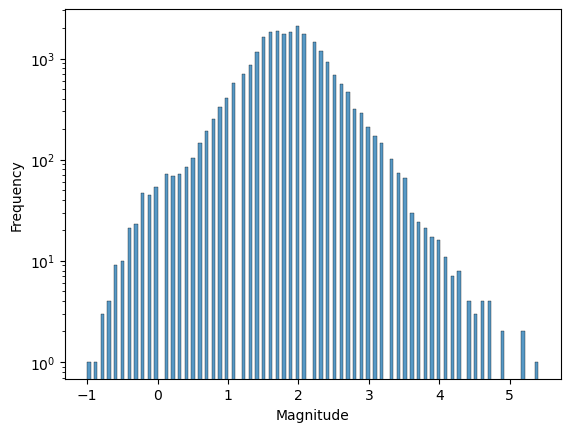

In [41]:
plt.figure()
sns.histplot(texNet_df['Local Magnitude'])
#make the yaxis log
plt.yscale('log')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')


plt.show()

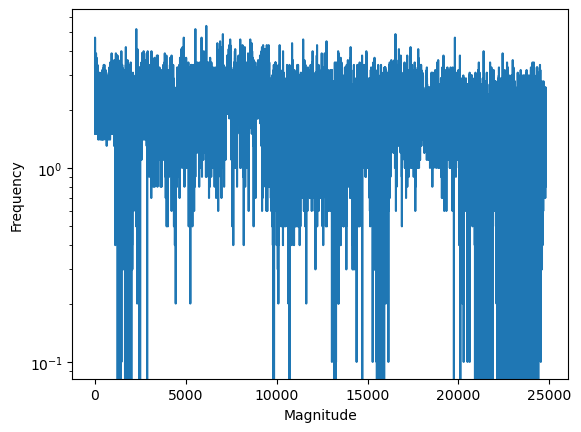

In [42]:
plt.figure()
plt.plot(texNet_df['Local Magnitude'], )
#make the yaxis log
plt.yscale('log')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')

plt.show()

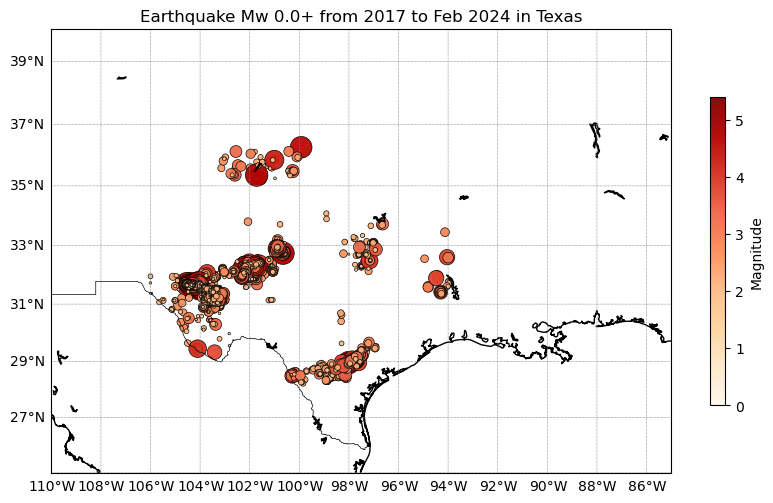

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [43]:
plt.figure(figsize=(10, 8))

map = Basemap(projection='merc', llcrnrlat=25, urcrnrlat=40, llcrnrlon=-110, urcrnrlon=-85, resolution='i')

map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(25, 41, 2), labels=[1, 0, 0, 0], linewidth=0.5, color='gray')
map.drawmeridians(np.arange(-110, -84, 2), labels=[0, 0, 0, 1], linewidth=0.5, color='gray')

x, y = map(texNet_df['Longitude (WGS84)'].values, texNet_df['Latitude (WGS84)'].values)
sc = map.scatter(x, y, s=texNet_df['Local Magnitude']**3.6, c=texNet_df['Local Magnitude'], cmap='OrRd', alpha=0.95, edgecolors='k', linewidth=0.5)

plt.title('Earthquake Mw 0.0+ from 2017 to Feb 2024 in Texas')

cbar = plt.colorbar(sc, shrink=0.5)
cbar.set_label('Magnitude')

plt.show()

#start at magnitude 2.0
plt.figure(figsize=(10, 8))


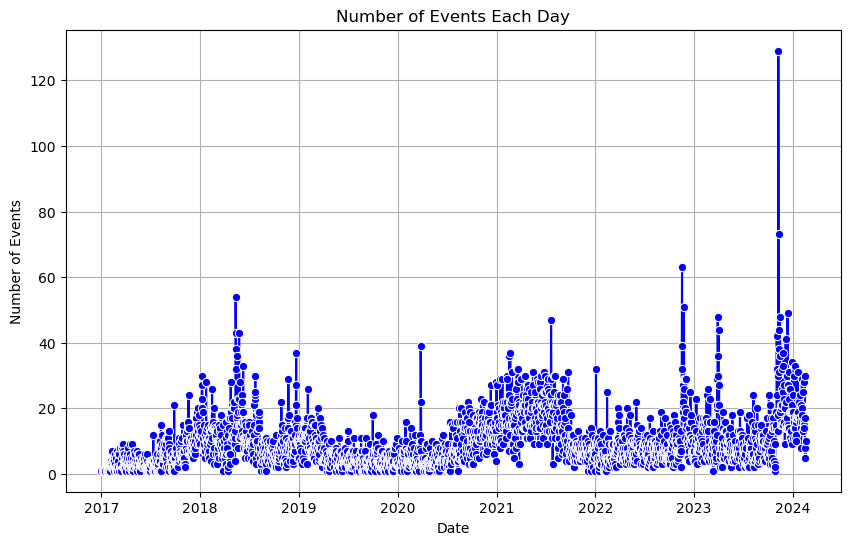

In [44]:
# Convert 'Origin Date' column to datetime format
texNet_df['Origin Date'] = pd.to_datetime(texNet_df['Origin Date'])

# Count the number of events for each unique date
event_count = texNet_df['Origin Date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=event_count.index, y=event_count.values, marker='o', color='b')
plt.title('Number of Events Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

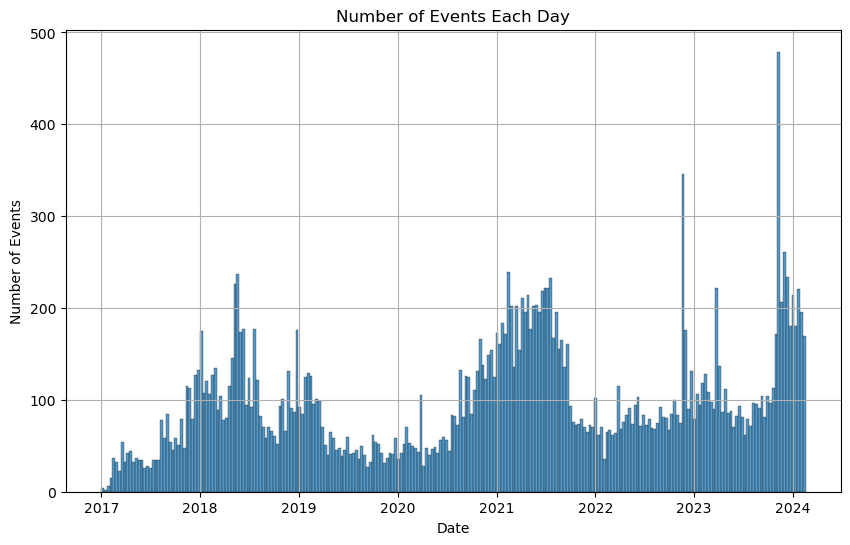

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=texNet_df, x='Origin Date', bins=250)
plt.title('Number of Events Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

In [46]:
# time to compare the seismicity rate in texas before an after after all the big earthquakes

# read the csv file from a link - magnitude Mw 7.0+ earthquakes from 2017 to today

usgs_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2017-01-01%2000:00:00&endtime=2024-02-19%2023:59:59&minmagnitude=7&eventtype=earthquake&orderby=time'
usgs_data = pd.read_csv(usgs_url)

# print the first 5 rows of the data
print(usgs_data.head())

URLError: <urlopen error [Errno 61] Connection refused>

In [47]:
usgs_data = pd.read_csv('earthquakes.csv')

In [53]:
usgs_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-22 18:09:04.340,41.2555,78.6538,13.0,7.0,mww,121.0,29.0,0.428,0.64,...,2024-03-30T22:32:25.040Z,"128 km WNW of Aykol, China",earthquake,4.68,1.811,0.054,33.0,reviewed,us,us
1,2024-01-01 07:10:09.476,37.4874,137.2710,10.0,7.5,mww,282.0,36.0,0.957,0.55,...,2024-04-03T02:56:24.004Z,"2024 Noto Peninsula, Japan Earthquake",earthquake,4.03,1.807,0.034,82.0,reviewed,us,us
2,2023-12-07 12:56:30.184,-20.6152,169.3089,48.0,7.1,mww,146.0,20.0,2.637,1.08,...,2024-02-10T23:47:40.040Z,"118 km S of Isangel, Vanuatu",earthquake,8.50,1.836,0.050,39.0,reviewed,us,us
3,2023-12-02 14:37:04.454,8.5266,126.4161,40.0,7.6,mww,128.0,43.0,1.668,0.98,...,2024-03-28T07:15:40.880Z,"19 km E of Gamut, Philippines",earthquake,8.48,1.895,0.028,124.0,reviewed,us,us
4,2023-11-08 04:53:49.631,-6.4160,129.5466,6.0,7.1,mww,142.0,53.0,5.771,0.70,...,2024-01-13T23:10:31.040Z,Banda Sea,earthquake,3.56,1.730,0.045,47.0,reviewed,us,us


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2519333003.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, earthquake_time in usgs_data['time'].iteritems():


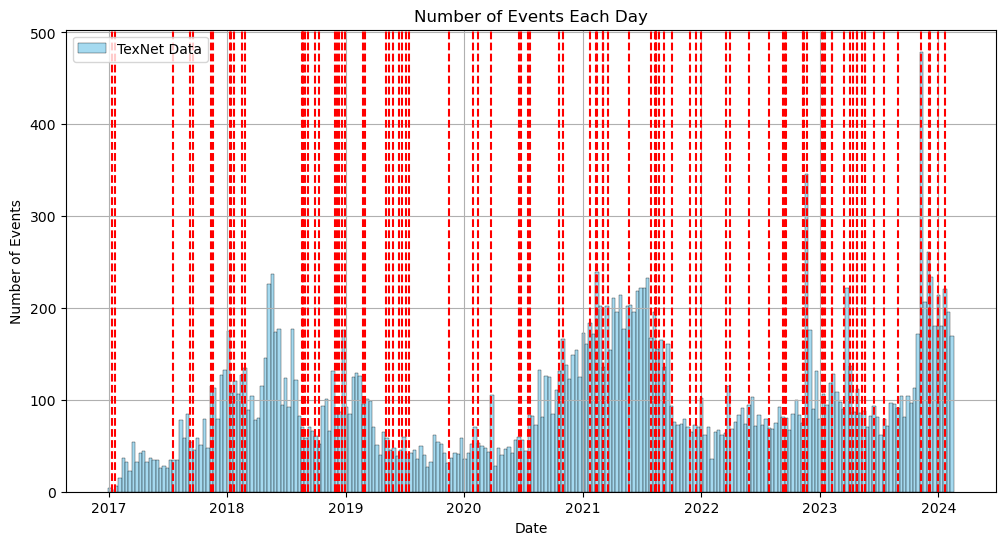

In [48]:

usgs_data['time'] = pd.to_datetime(usgs_data['time']).dt.tz_localize(None)

plt.figure(figsize=(12, 6))

sns.histplot(data=texNet_df, x='Origin Date', bins=250, color='skyblue', label='TexNet Data')

for index, earthquake_time in usgs_data['time'].iteritems():
    plt.axvline(x=earthquake_time, color='r', linestyle='--')

plt.title('Number of Events Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

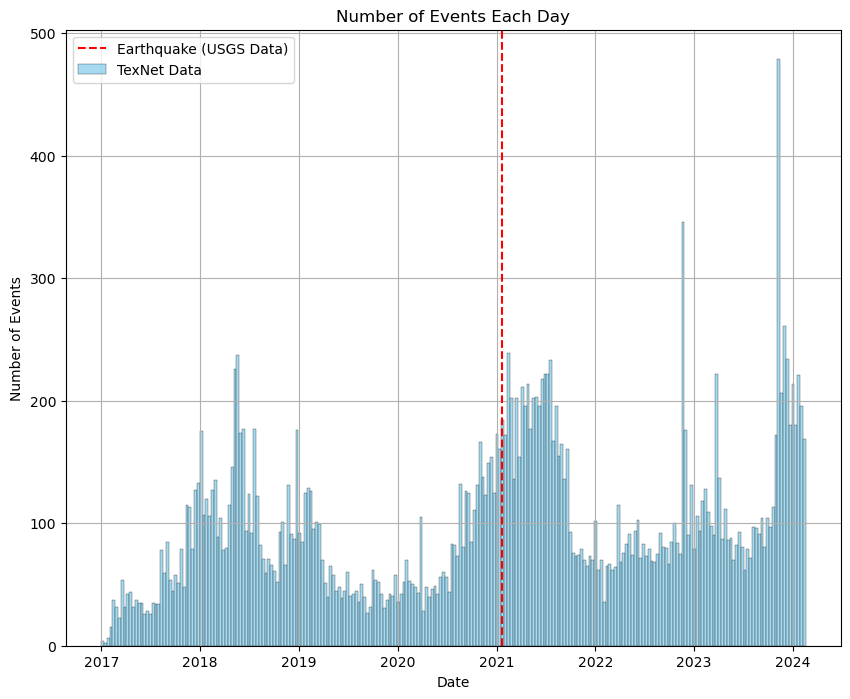

In [49]:
usgs_data['time'] = pd.to_datetime(usgs_data['time']).dt.tz_localize(None)

plt.figure(figsize=(10, 8))

sns.histplot(data=texNet_df, x='Origin Date', bins=250, color='skyblue', label='TexNet Data')

plt.axvline(x=usgs_data['time'].iloc[50], color='r', linestyle='--', label='Earthquake (USGS Data)')

plt.title('Number of Events Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# let's work on the first earthquake in the data
earthquake_2023 = usgs_data[usgs_data['time'].str.contains('2023')]

first_eq = earthquake_2023.iloc[0]
print(first_eq)

AttributeError: Can only use .str accessor with string values!

In [54]:
#generate the subset of texnet dataframe to include the events 5 hours before and after the first earthquake

texNet_df['Origin Date'] = pd.to_datetime(texNet_df['Origin Date'])
texNet_df['Origin Time'] = pd.to_datetime(texNet_df['Origin Time'])

texNet_df['Datetime'] = texNet_df['Origin Date'] + pd.to_timedelta(texNet_df['Origin Time'].dt.strftime('%H:%M:%S'))

first_eq_time = pd.to_datetime(first_eq['time'])

first_eq_time = first_eq_time.tz_localize(None)  # Remove timezone awareness

five_hours_before = first_eq_time - pd.Timedelta(hours=5)
five_hours_after = first_eq_time + pd.Timedelta(hours=5)

# Filter texNet_df for events within the specified time range
texNet_subset_df = texNet_df[(texNet_df['Datetime'] >= five_hours_before) & (texNet_df['Datetime'] <= five_hours_after)]

print(texNet_subset_df)

NameError: name 'first_eq' is not defined

In [55]:
# Combine origin date and origin time to create a datetime column
texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))

# Plot the number of events each timestamp
plt.figure(figsize=(8, 6))
sns.histplot(data=texNet_subset_df, x='Datetime', bins=len(texNet_subset_df['Datetime']))
plt.title('Number of Events Each Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Number of Events')
plt.grid(True)

# Plot the timing of the first earthquake
first_eq_time = pd.to_datetime(first_eq['time'])
plt.axvline(x=first_eq_time, color='r', linestyle='--', label='First Earthquake')

plt.legend()
plt.show()

NameError: name 'texNet_subset_df' is not defined

In [56]:
#repeatin the same process for the second earthquake
second_eq = earthquake_2023.iloc[1]

#generate the subset of texnet dataframe to include the events 5 hours before and after the first earthquake

texNet_df['Origin Date'] = pd.to_datetime(texNet_df['Origin Date'])
texNet_df['Origin Time'] = pd.to_datetime(texNet_df['Origin Time'])

texNet_df['Datetime'] = texNet_df['Origin Date'] + pd.to_timedelta(texNet_df['Origin Time'].dt.strftime('%H:%M:%S'))

second_eq_time = pd.to_datetime(second_eq['time'])

second_eq_time = second_eq_time.tz_localize(None)  # Remove timezone awareness

five_hours_before = second_eq_time - pd.Timedelta(hours=5)
five_hours_after = second_eq_time + pd.Timedelta(hours=5)

# Filter texNet_df for events within the specified time range
texNet_subset_df = texNet_df[(texNet_df['Datetime'] >= five_hours_before) & (texNet_df['Datetime'] <= five_hours_after)]

texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))

# Plot the number of events each timestamp
plt.figure(figsize=(8, 6))
sns.histplot(data=texNet_subset_df, x='Datetime')
plt.title('Number of Events Each Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Number of Events')
plt.grid(True)

# Plot the timing of the first earthquake
second_eq_time = pd.to_datetime(second_eq['time'])
plt.axvline(x=second_eq_time, color='r', linestyle='--', label='Second Earthquake')

plt.legend()
plt.show()

NameError: name 'earthquake_2023' is not defined

In [57]:
# running the loop the get the data for all the earthquakes
usgs_data['time'] = pd.to_datetime(usgs_data['time'])
print(usgs_data['time'])

0    2024-01-22 18:09:04.340
1    2024-01-01 07:10:09.476
2    2023-12-07 12:56:30.184
3    2023-12-02 14:37:04.454
4    2023-11-08 04:53:49.631
               ...          
89   2017-09-19 18:14:38.090
90   2017-09-08 04:49:19.180
91   2017-07-17 23:34:13.740
92   2017-01-22 04:30:22.960
93   2017-01-10 06:13:48.140
Name: time, Length: 94, dtype: datetime64[ns]


In [59]:
# Initialize counters
events_before_count = []
events_after_count = []

for i in range(len(usgs_data)):
    eq = usgs_data.iloc[i]

    eq_time = pd.to_datetime(eq['time'])
    eq_time = eq_time.tz_localize(None)  # Remove timezone awareness

    five_hours_before = eq_time - pd.Timedelta(hours=5)
    five_hours_after = eq_time + pd.Timedelta(hours=5)

    # Filter texNet_df for events within the specified time range
    texNet_subset_before = texNet_df[(texNet_df['Datetime'] >= five_hours_before) & (texNet_df['Datetime'] <= eq_time)]
    texNet_subset_after = texNet_df[(texNet_df['Datetime'] >= eq_time) & (texNet_df['Datetime'] <= five_hours_after)]

    # Count the number of events before and after the earthquake
    events_before_count.append(len(texNet_subset_before))
    events_after_count.append(len(texNet_subset_after))

# Calculate statistics
average_events_before = sum(events_before_count) / len(events_before_count)
average_events_after = sum(events_after_count) / len(events_after_count)
max_events_before = max(events_before_count)
max_events_after = max(events_after_count)

print("Statistics on the number of tenet earthquakes:")
print(f"Average number of tenet earthquakes 5 hours before: {average_events_before:.2f}")
print(f"Average number of tenet earthquakes 5 hours after: {average_events_after:.2f}")
print(f"Maximum number of tenet earthquakes 5 hours before: {max_events_before}")
print(f"Maximum number of tenet earthquakes 5 hours after: {max_events_after}")


Statistics on the number of tenet earthquakes:
Average number of tenet earthquakes 5 hours before: 2.15
Average number of tenet earthquakes 5 hours after: 1.95
Maximum number of tenet earthquakes 5 hours before: 13
Maximum number of tenet earthquakes 5 hours after: 10


In [60]:
# Initialize counters
higher_after_count = 0
total_events = len(usgs_data)

for i in range(len(usgs_data)):
    eq = usgs_data.iloc[i]

    eq_time = pd.to_datetime(eq['time'])
    eq_time = eq_time.tz_localize(None)  # Remove timezone awareness

    five_hours_before = eq_time - pd.Timedelta(hours=5)
    five_hours_after = eq_time + pd.Timedelta(hours=5)

    # Filter texNet_df for events within the specified time range
    texNet_subset_before = texNet_df[(texNet_df['Datetime'] >= five_hours_before) & (texNet_df['Datetime'] <= eq_time)]
    texNet_subset_after = texNet_df[(texNet_df['Datetime'] >= eq_time) & (texNet_df['Datetime'] <= five_hours_after)]

    # Count the number of events before and after the earthquake
    count_before = len(texNet_subset_before)
    count_after = len(texNet_subset_after)

    # Check if the number of events after the earthquake is higher
    if count_after > count_before:
        higher_after_count += 1

# Calculate percentage
percentage_higher_after = (higher_after_count / total_events) * 100

print(f"For {higher_after_count} events out of {total_events}, the number of events after the earthquake is higher.")
print(f"This is {percentage_higher_after:.2f}% of all events.")

For 36 events out of 94, the number of events after the earthquake is higher.
This is 38.30% of all events.


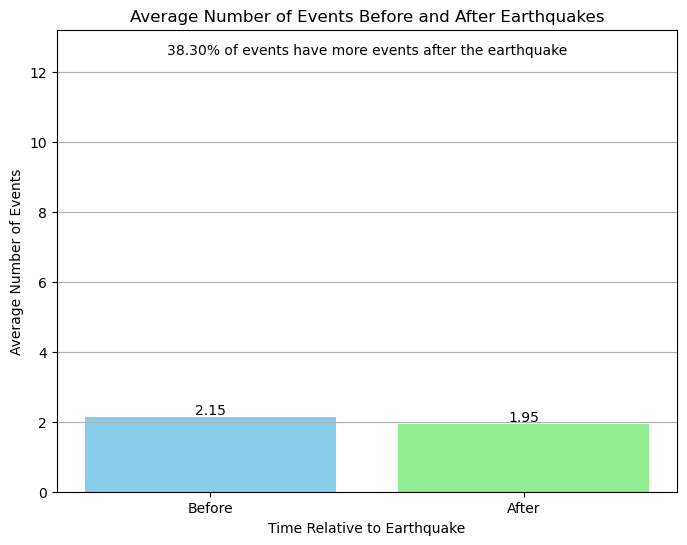

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize counters
higher_after_count = 0
total_events = len(usgs_data)

# Initialize lists to store counts
events_before_count = []
events_after_count = []

for i in range(len(usgs_data)):
    eq = usgs_data.iloc[i]

    eq_time = pd.to_datetime(eq['time'])
    eq_time = eq_time.tz_localize(None)  # Remove timezone awareness

    five_hours_before = eq_time - pd.Timedelta(hours=5)
    five_hours_after = eq_time + pd.Timedelta(hours=5)

    # Filter texNet_df for events within the specified time range
    texNet_subset_before = texNet_df[(texNet_df['Datetime'] >= five_hours_before) & (texNet_df['Datetime'] <= eq_time)]
    texNet_subset_after = texNet_df[(texNet_df['Datetime'] >= eq_time) & (texNet_df['Datetime'] <= five_hours_after)]

    # Count the number of events before and after the earthquake
    count_before = len(texNet_subset_before)
    count_after = len(texNet_subset_after)

    # Append counts to lists
    events_before_count.append(count_before)
    events_after_count.append(count_after)

    # Check if the number of events after the earthquake is higher
    if count_after > count_before:
        higher_after_count += 1

# Calculate percentage
percentage_higher_after = (higher_after_count / total_events) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Before', 'After'], [sum(events_before_count) / total_events, sum(events_after_count) / total_events], color=['skyblue', 'lightgreen'])
plt.title('Average Number of Events Before and After Earthquakes')
plt.xlabel('Time Relative to Earthquake')
plt.ylabel('Average Number of Events')
plt.text(0, sum(events_before_count) / total_events + 0.05, f"{sum(events_before_count) / total_events:.2f}", ha='center')
plt.text(1, sum(events_after_count) / total_events + 0.05, f"{sum(events_after_count) / total_events:.2f}", ha='center')
plt.ylim(0, max(max(events_before_count), max(events_after_count)) + 0.2)
plt.grid(axis='y')

# Add text for percentage
plt.text(0.5, max(max(events_before_count), max(events_after_count)) - 0.5, f"{percentage_higher_after:.2f}% of events have more events after the earthquake", ha='center')

plt.show()

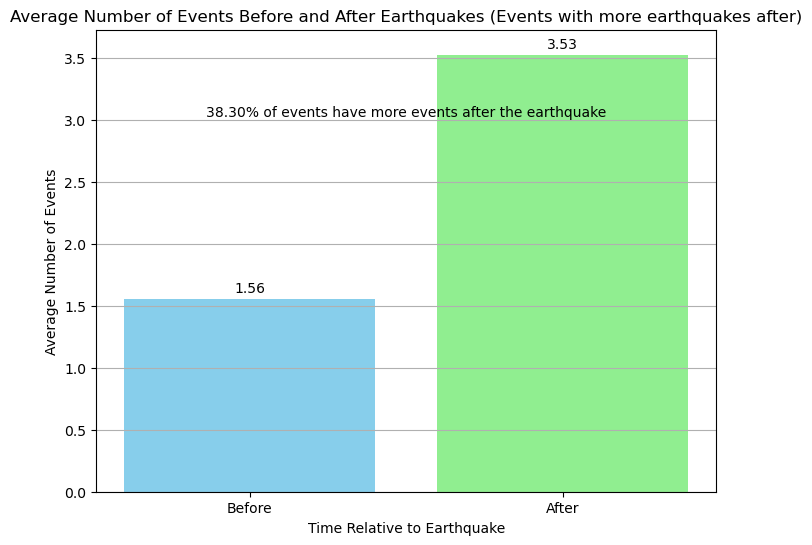

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize counters
higher_after_count = 0
total_events = len(usgs_data)

# Initialize lists to store counts
events_before_count = []
events_after_count = []

for i in range(len(usgs_data)):
    eq = usgs_data.iloc[i]

    eq_time = pd.to_datetime(eq['time'])
    eq_time = eq_time.tz_localize(None)  # Remove timezone awareness

    five_hours_before = eq_time - pd.Timedelta(hours=5)
    five_hours_after = eq_time + pd.Timedelta(hours=5)

    # Filter texNet_df for events within the specified time range
    texNet_subset_before = texNet_df[(texNet_df['Datetime'] >= five_hours_before) & (texNet_df['Datetime'] <= eq_time)]
    texNet_subset_after = texNet_df[(texNet_df['Datetime'] >= eq_time) & (texNet_df['Datetime'] <= five_hours_after)]

    # Count the number of events before and after the earthquake
    count_before = len(texNet_subset_before)
    count_after = len(texNet_subset_after)

    # Append counts to lists
    events_before_count.append(count_before)
    events_after_count.append(count_after)

    # Check if the number of events after the earthquake is higher
    if count_after > count_before:
        higher_after_count += 1

# Calculate percentage
percentage_higher_after = (higher_after_count / total_events) * 100

# Filter events where the number of earthquakes after is greater than before
filtered_events_before = [events_before_count[i] for i in range(len(events_before_count)) if events_after_count[i] > events_before_count[i]]
filtered_events_after = [events_after_count[i] for i in range(len(events_before_count)) if events_after_count[i] > events_before_count[i]]

# Calculate the average number of events before and after earthquakes
average_events_before = sum(filtered_events_before) / len(filtered_events_before)
average_events_after = sum(filtered_events_after) / len(filtered_events_after)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Before', 'After'], [average_events_before, average_events_after], color=['skyblue', 'lightgreen'])
plt.title('Average Number of Events Before and After Earthquakes (Events with more earthquakes after)')
plt.xlabel('Time Relative to Earthquake')
plt.ylabel('Average Number of Events')
plt.text(0, average_events_before + 0.05, f"{average_events_before:.2f}", ha='center')
plt.text(1, average_events_after + 0.05, f"{average_events_after:.2f}", ha='center')
plt.ylim(0, max(average_events_before, average_events_after) + 0.2)
plt.grid(axis='y')

# Add text for percentage
plt.text(0.5, max(average_events_before, average_events_after) - 0.5, f"{percentage_higher_after:.2f}% of events have more events after the earthquake", ha='center')

plt.show()

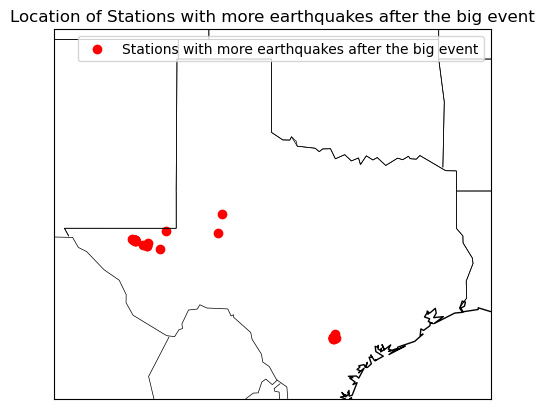

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Extract longitude and latitude values
lon = texNet_df['Longitude (WGS84)'].values
lat = texNet_df['Latitude (WGS84)'].values

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=min(lat)-1, urcrnrlat=max(lat)+1,
            llcrnrlon=min(lon)-1, urcrnrlon=max(lon)+1, resolution='l')

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Find indices where the number of earthquakes after the big event is greater
indices = [i for i, (after, before) in enumerate(zip(events_after_count, events_before_count)) if after > before]

# Filter texNet_df based on the indices
filtered_texNet_df = texNet_df.iloc[indices]

# Extract latitude and longitude values for filtered stations
lon_filtered = filtered_texNet_df['Longitude (WGS84)'].values
lat_filtered = filtered_texNet_df['Latitude (WGS84)'].values

# Convert latitude and longitude to map coordinates for filtered stations
x, y = m(lon_filtered, lat_filtered)

# Plot filtered stations on the map
m.scatter(x, y, color='red', marker='o', label='Stations with more earthquakes after the big event')

# Add title and legend
plt.title('Location of Stations with more earthquakes after the big event')
plt.legend()

# Show the map
plt.show()


Length of subset: 12


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


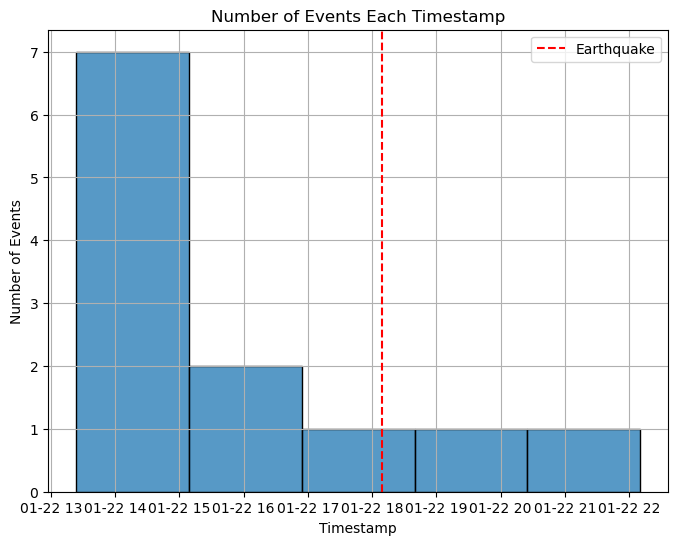

Length of subset: 17


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


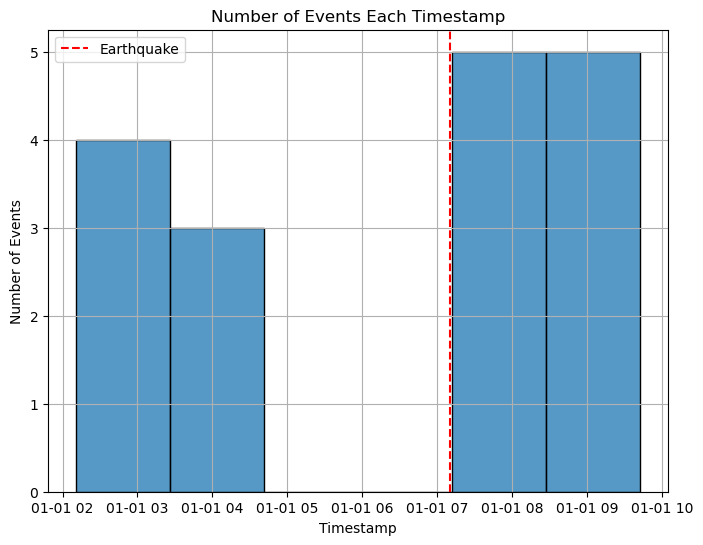

Length of subset: 7


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


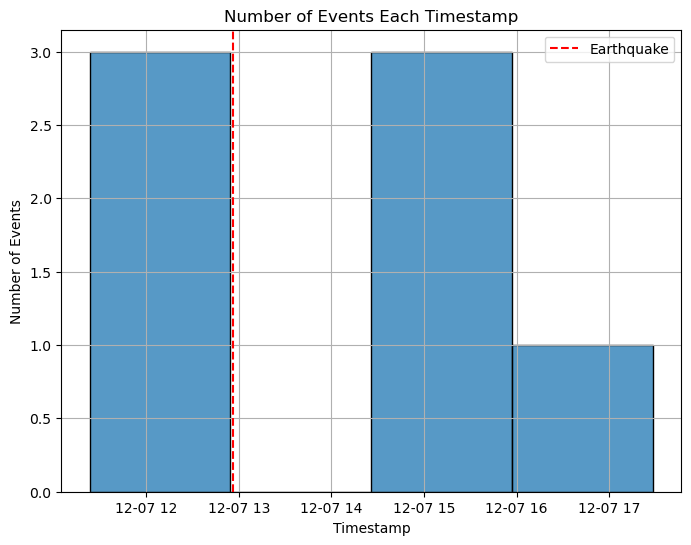

Length of subset: 6


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


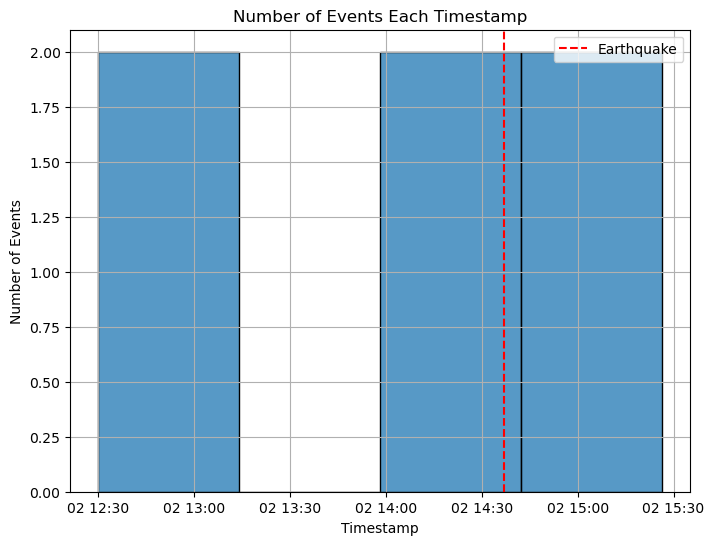

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


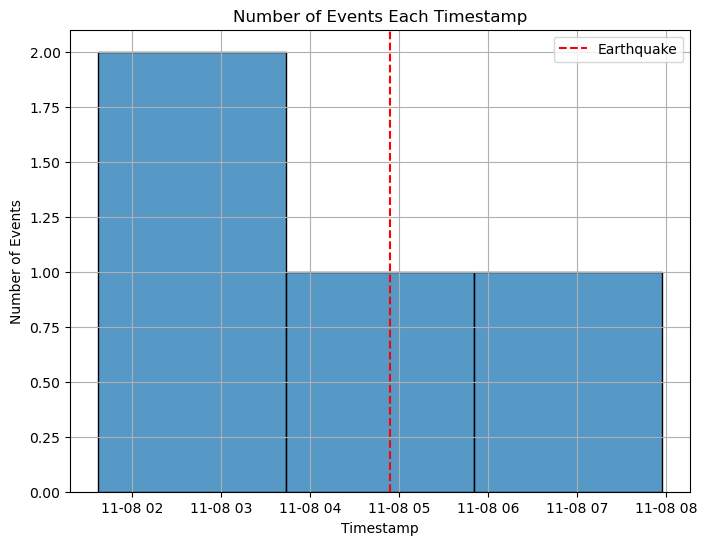

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


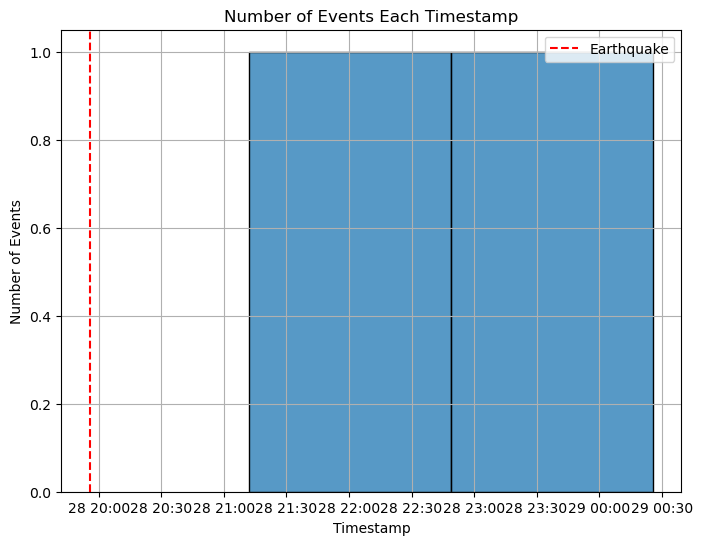

Length of subset: 7


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


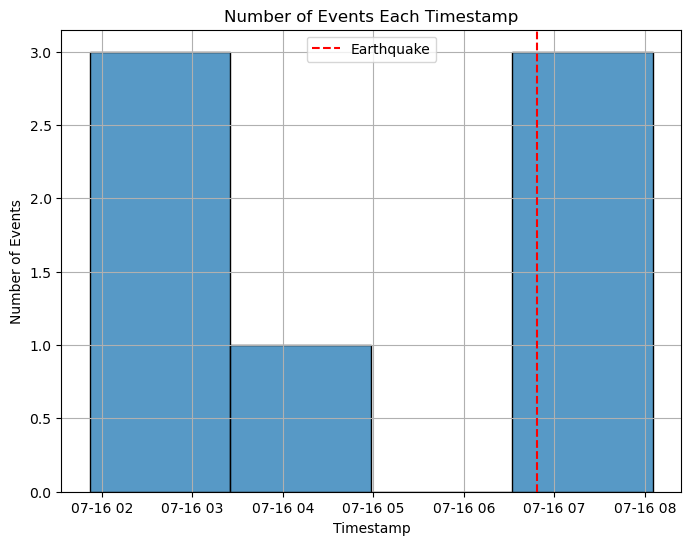

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


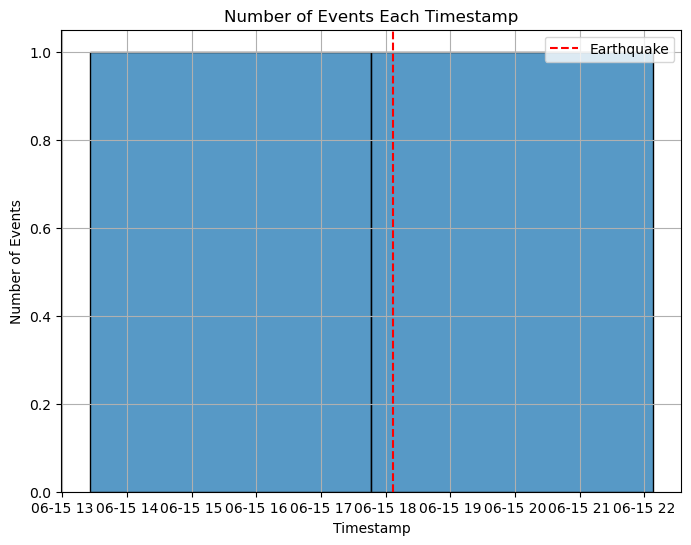

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


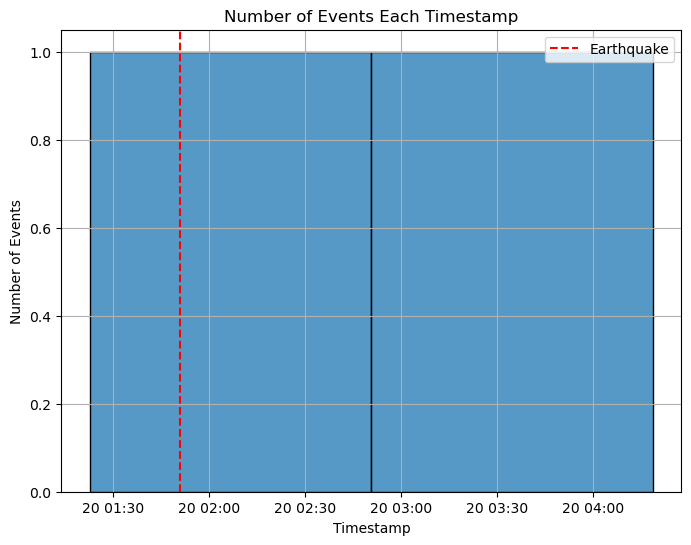

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


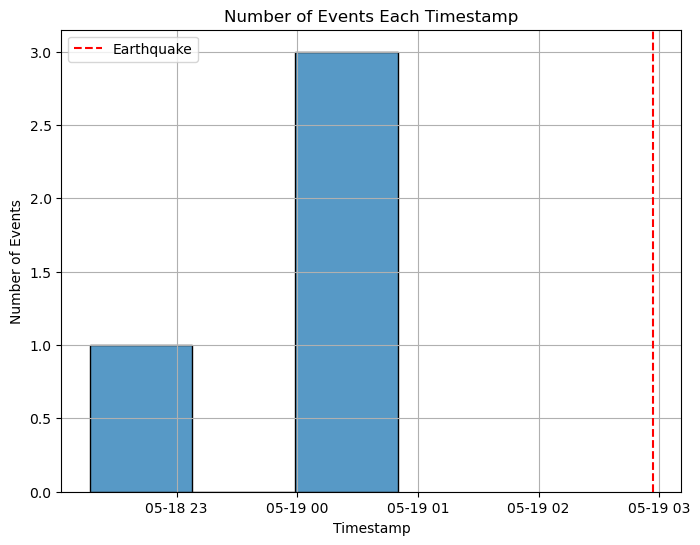

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


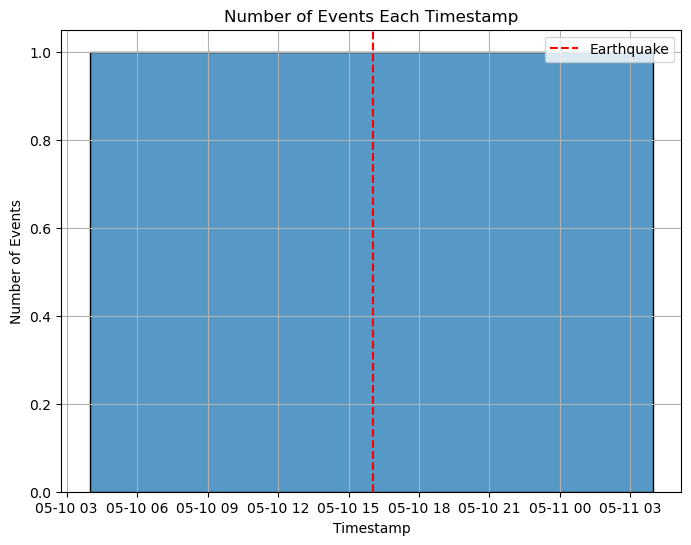

Length of subset: 3


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


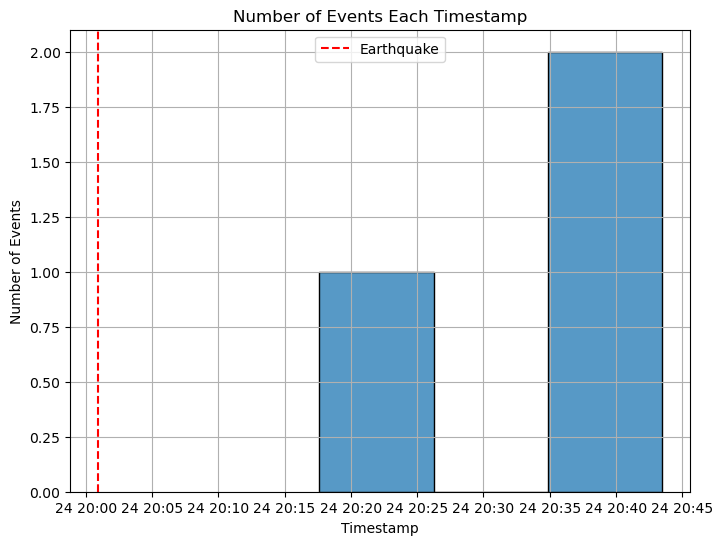

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


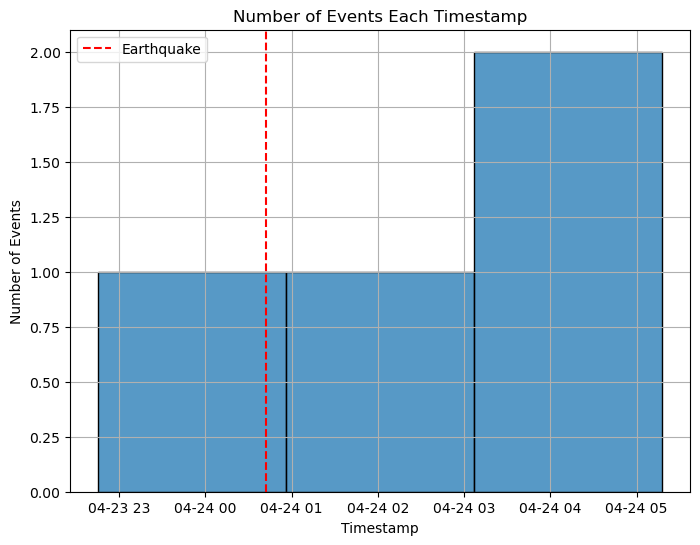

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


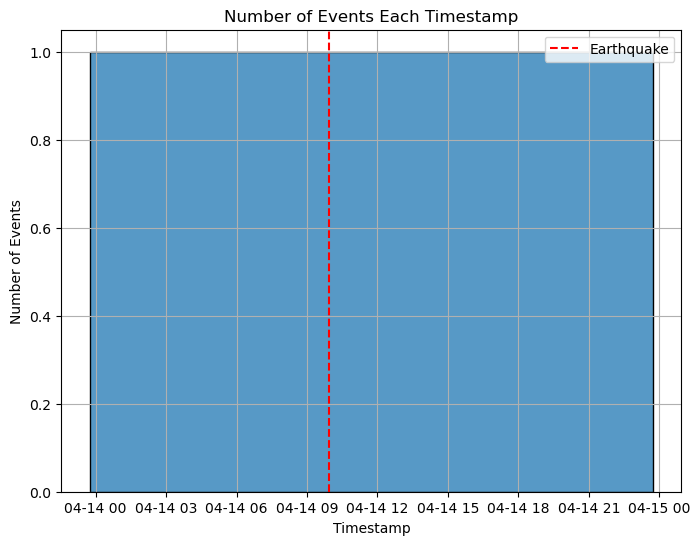

/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


Length of subset: 3


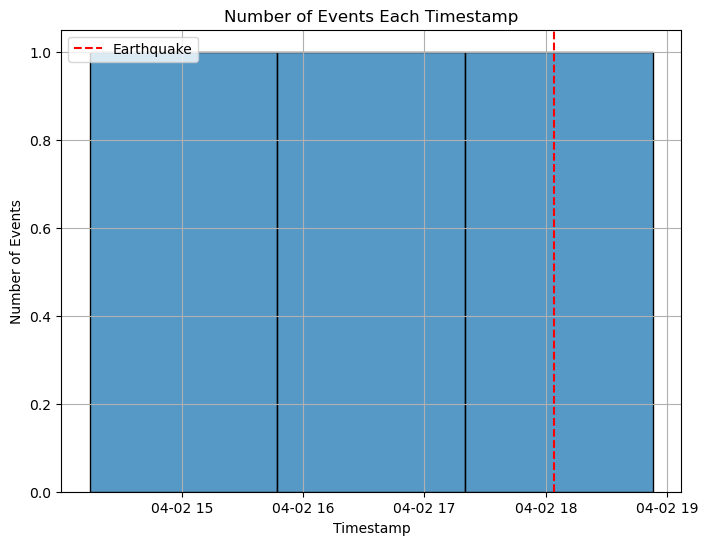

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


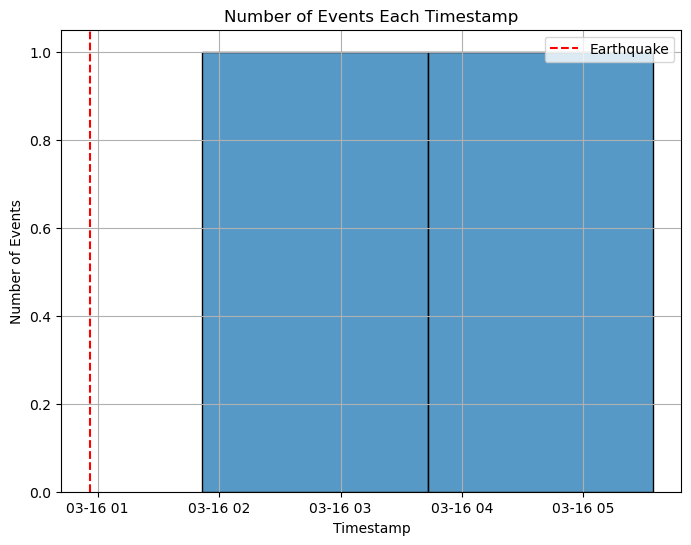

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


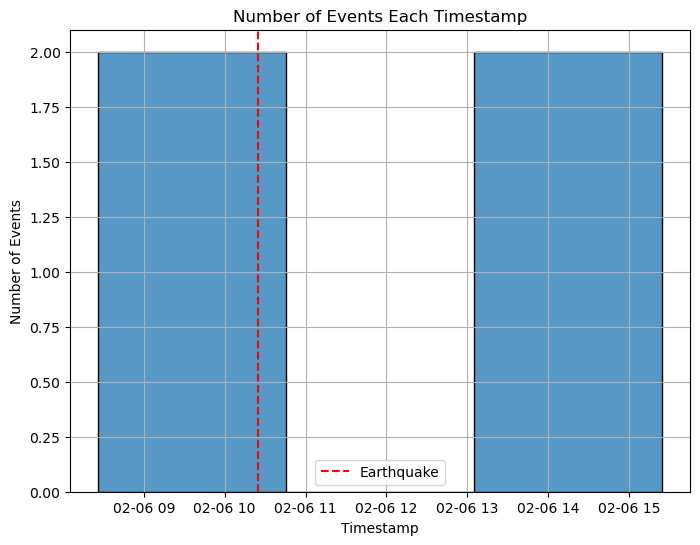

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


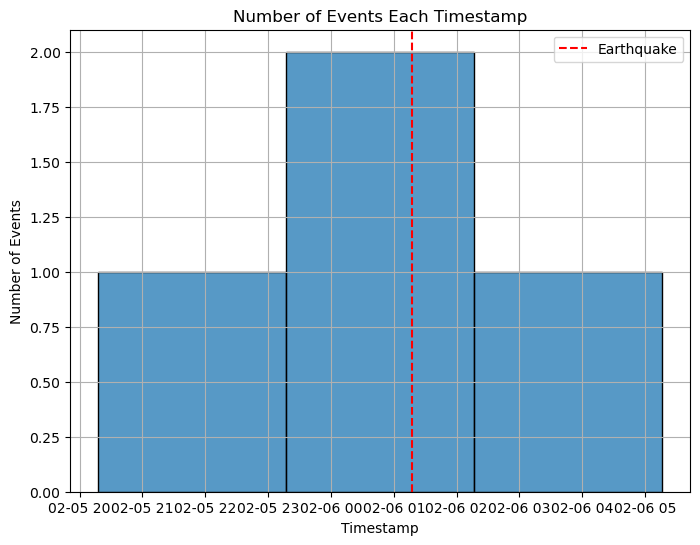

Length of subset: 3


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


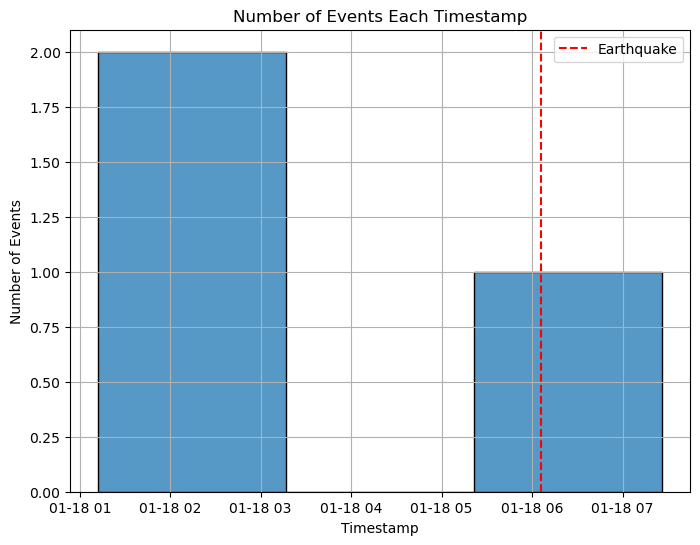

Length of subset: 6


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


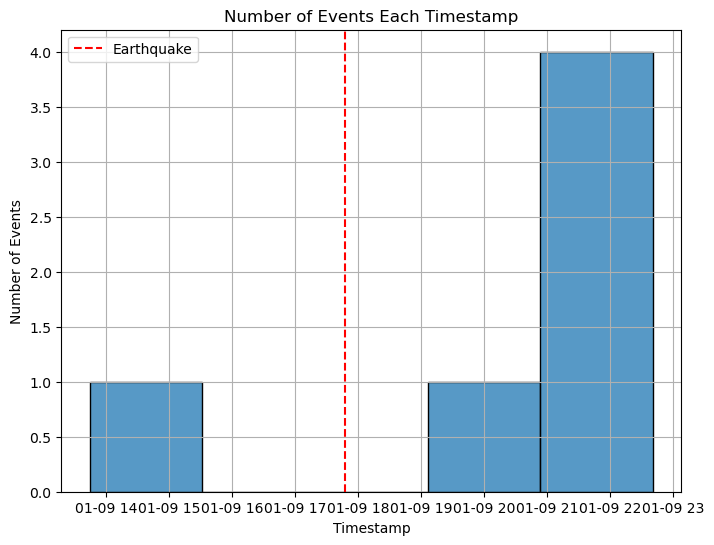

Length of subset: 7


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


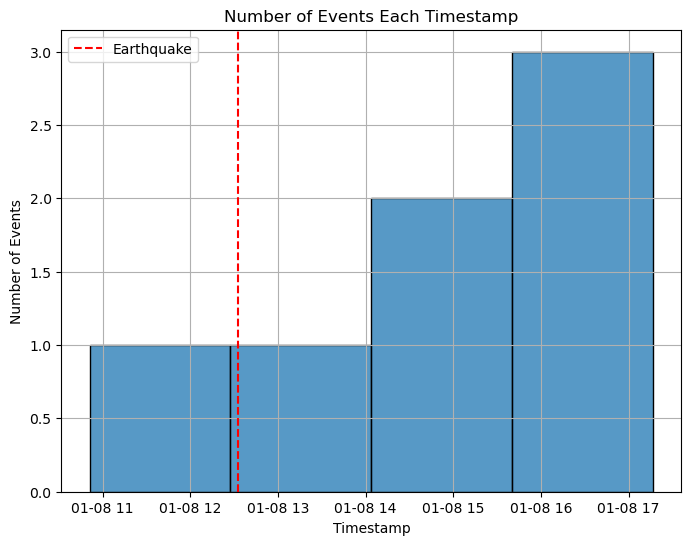

Length of subset: 11


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


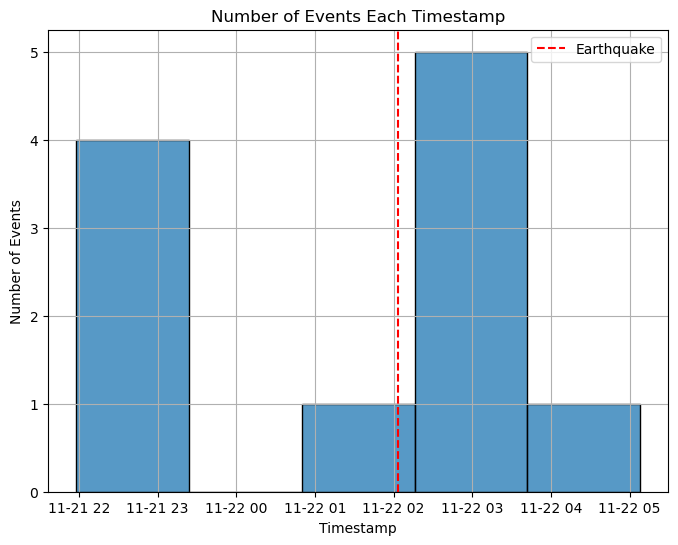

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


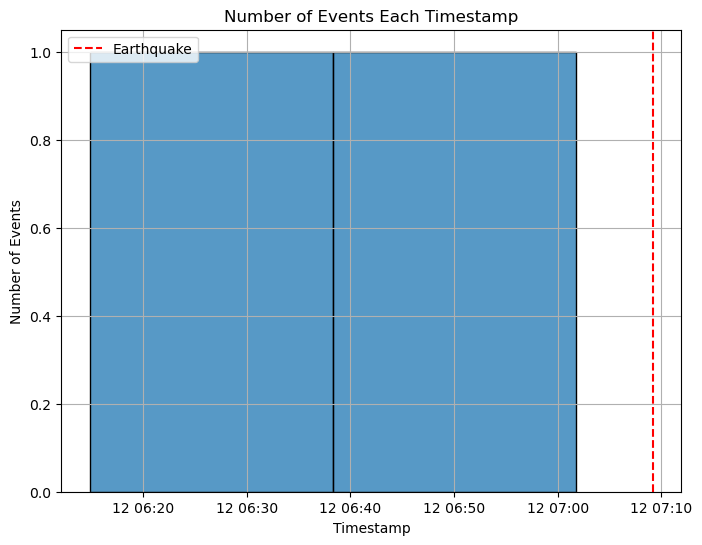

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


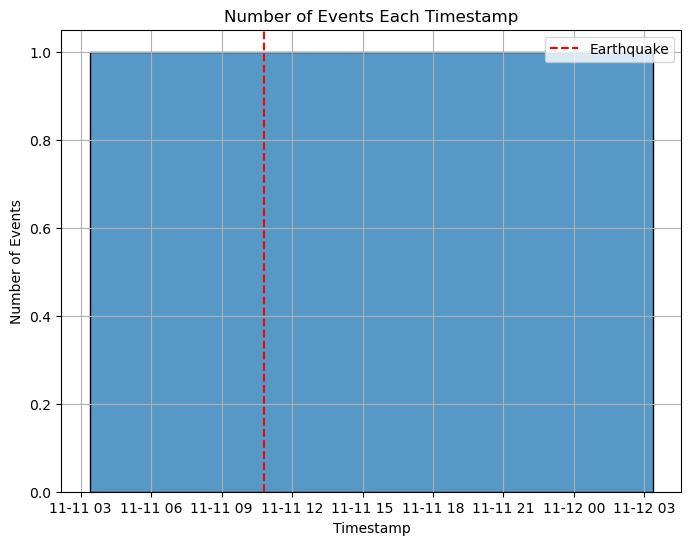

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


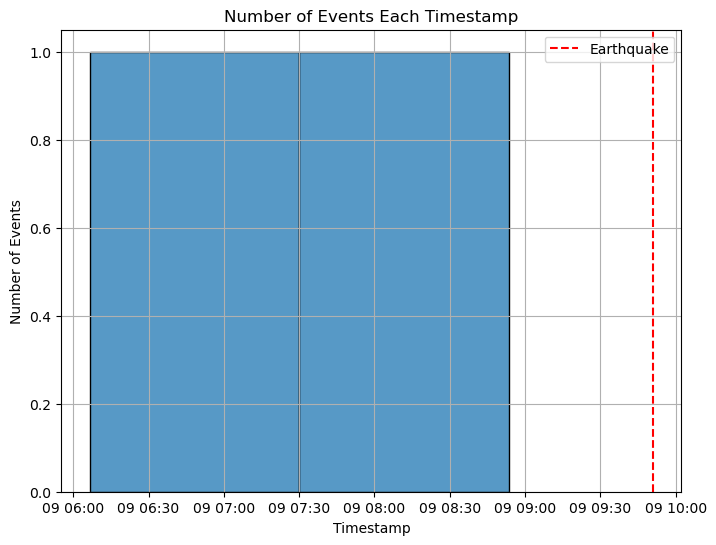

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


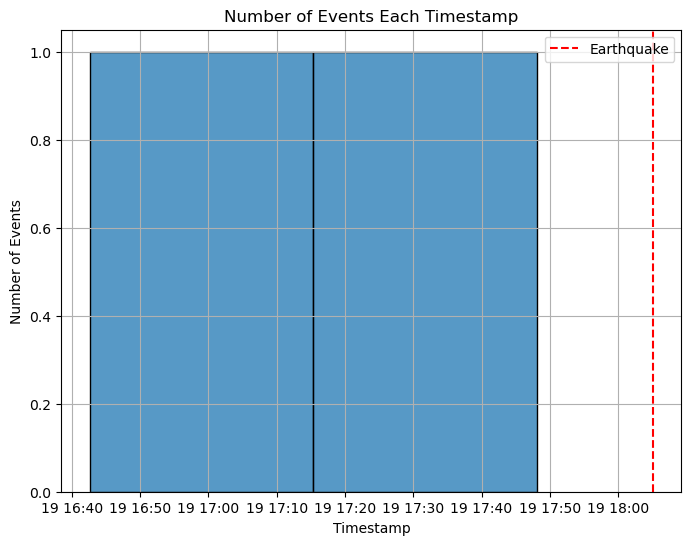

Length of subset: 0


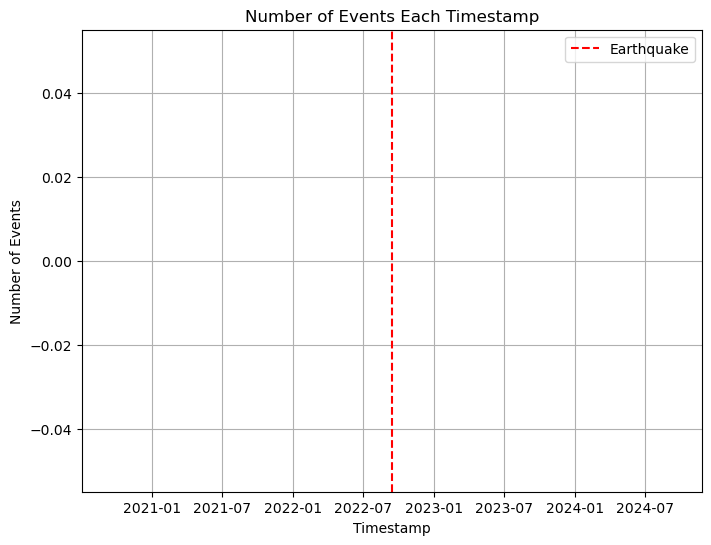

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


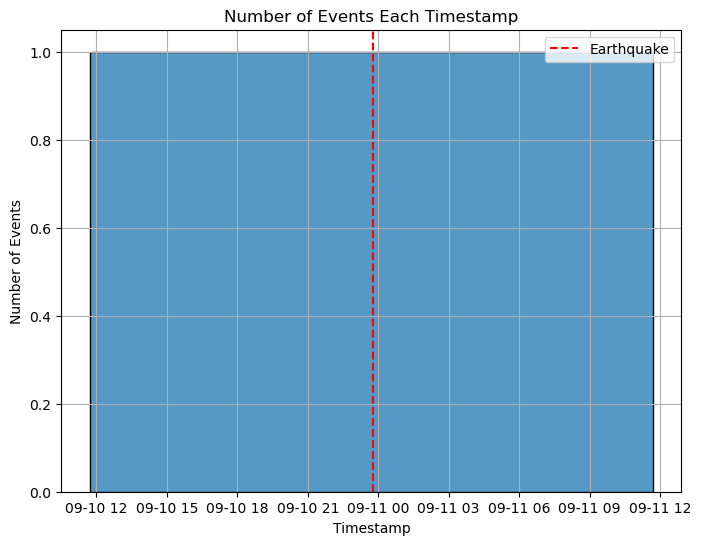

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


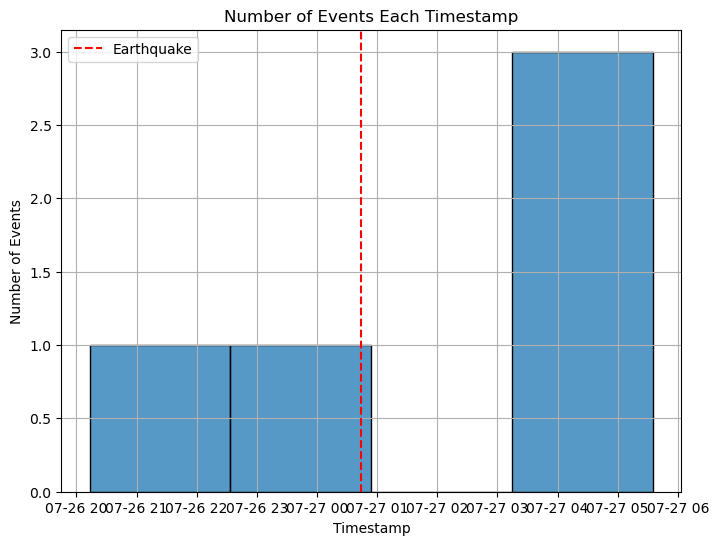

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


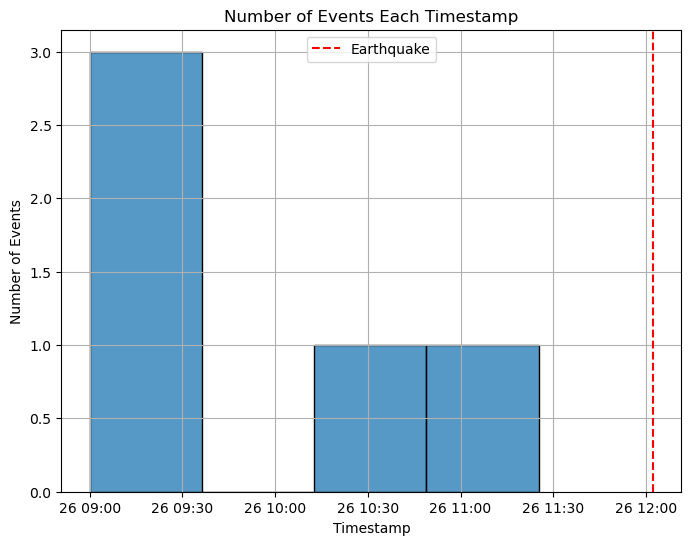

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


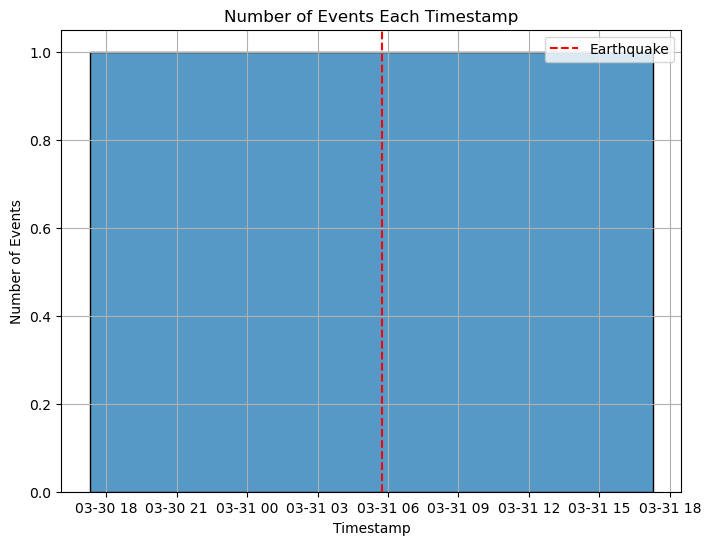

Length of subset: 0


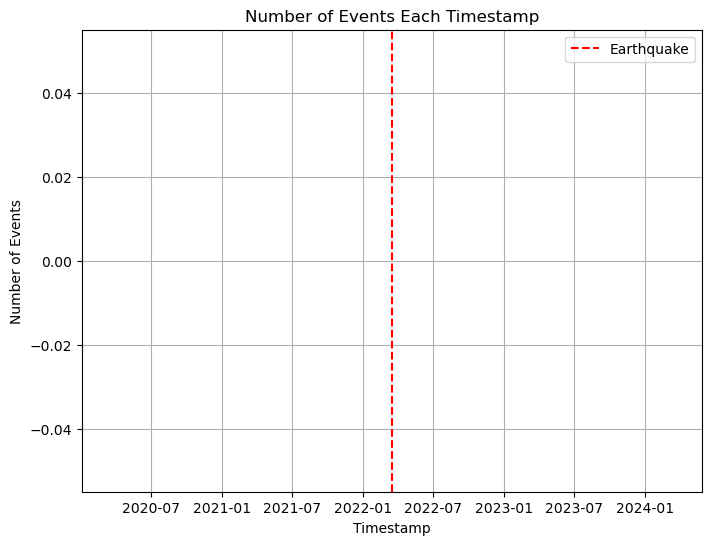

Length of subset: 7


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


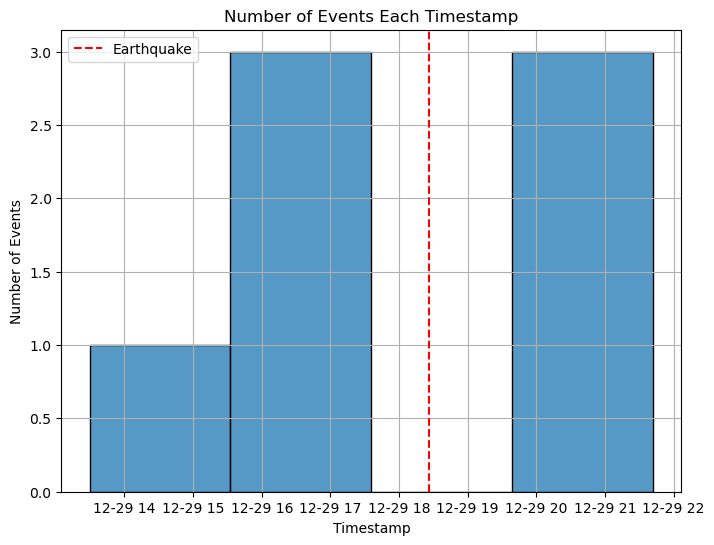

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


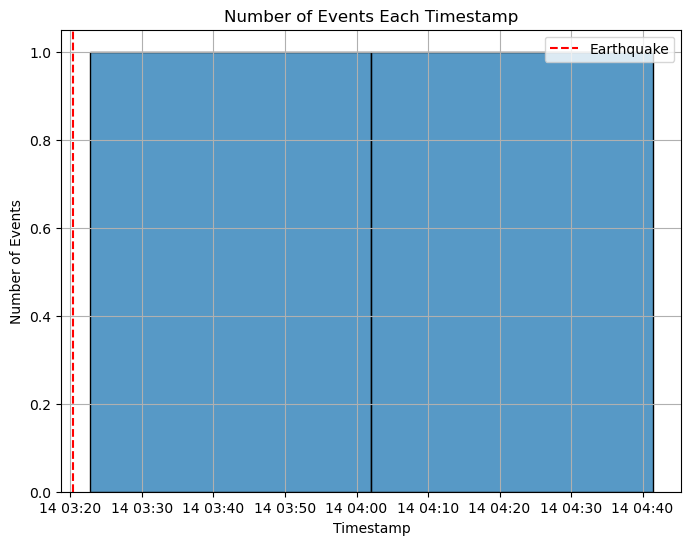

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


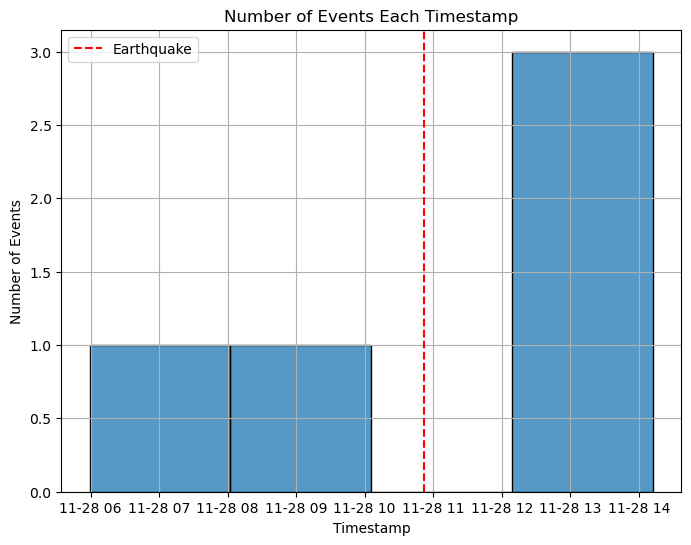

Length of subset: 0


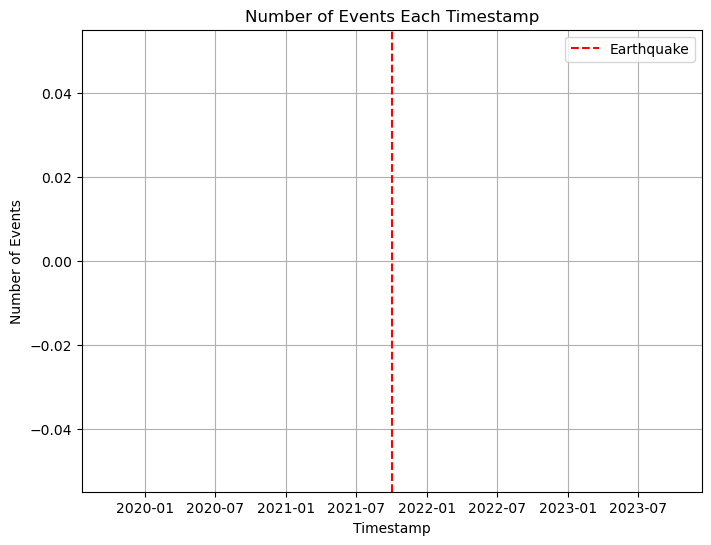

Length of subset: 7


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


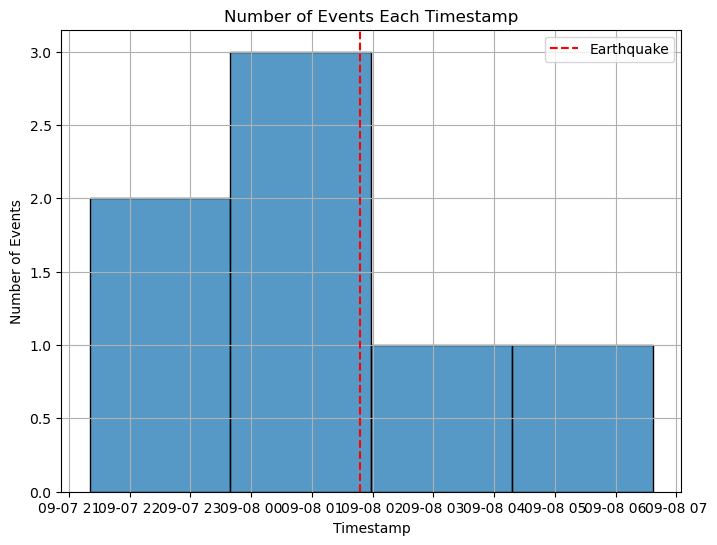

Length of subset: 13


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


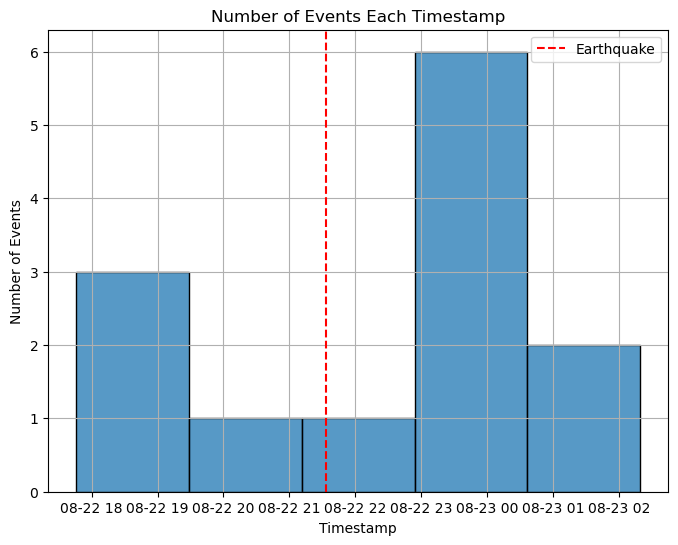

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


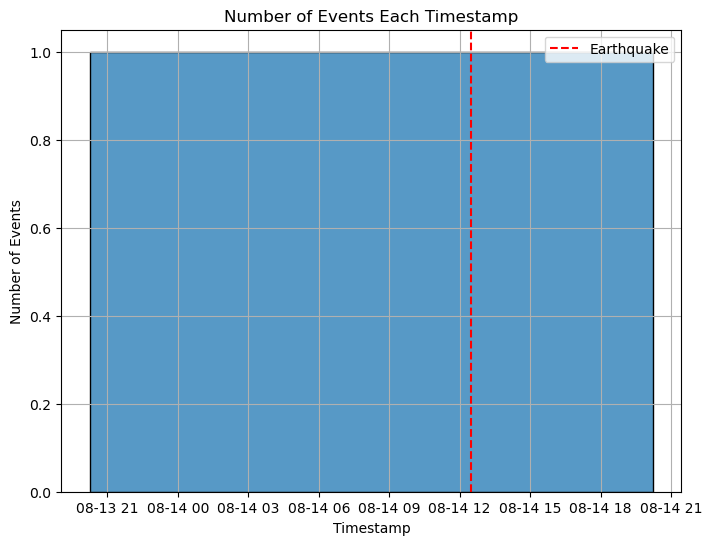

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


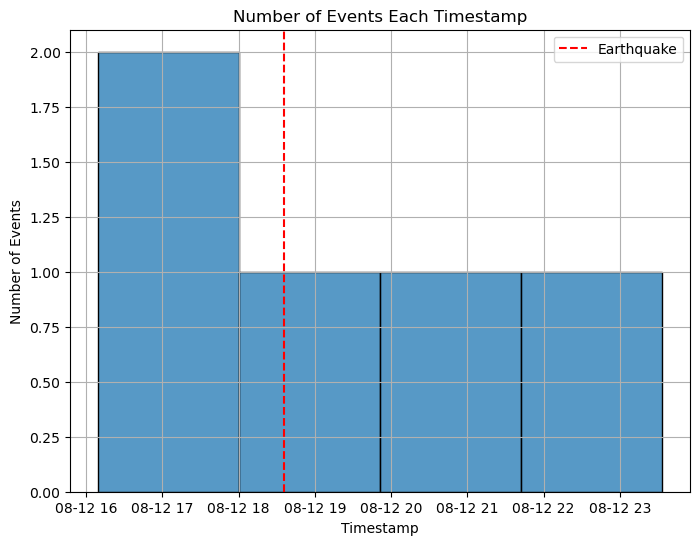

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


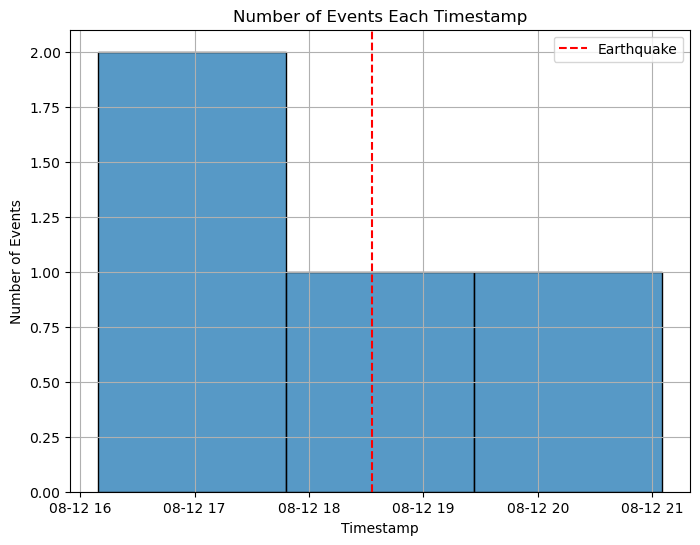

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


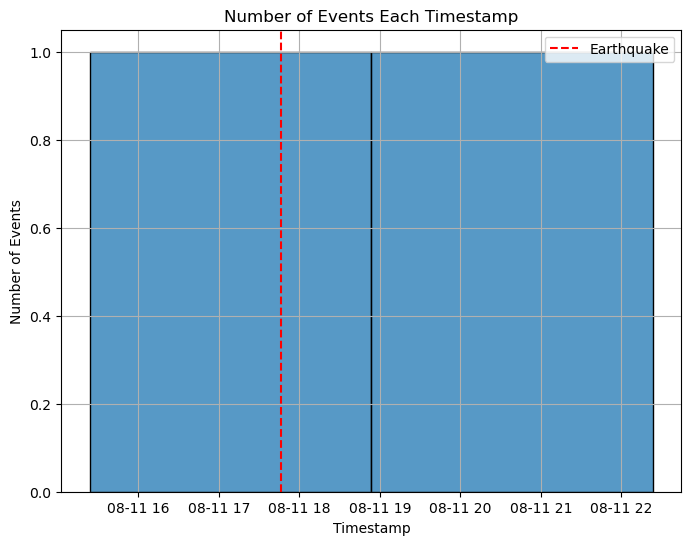

Length of subset: 7


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


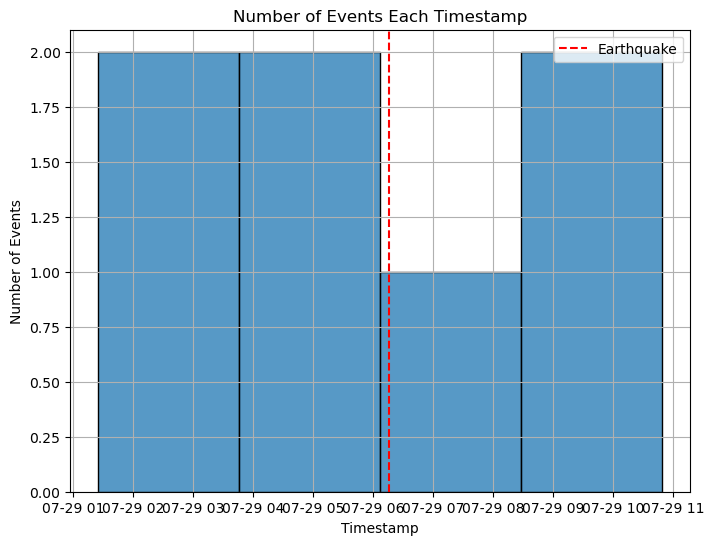

Length of subset: 13


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


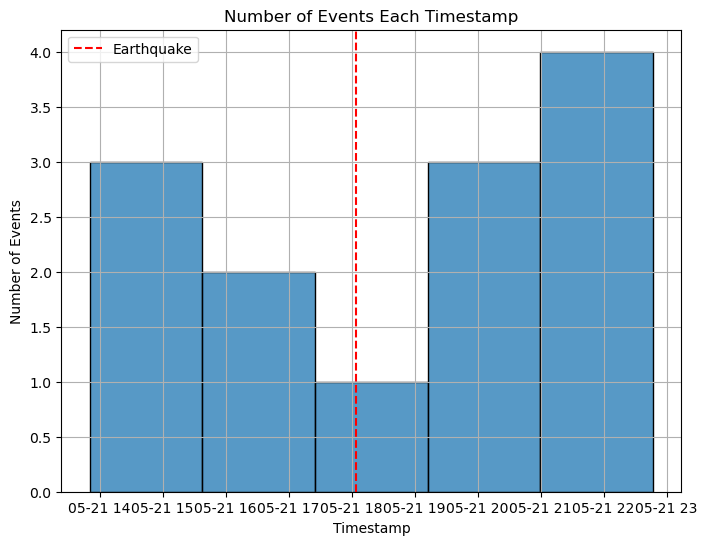

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


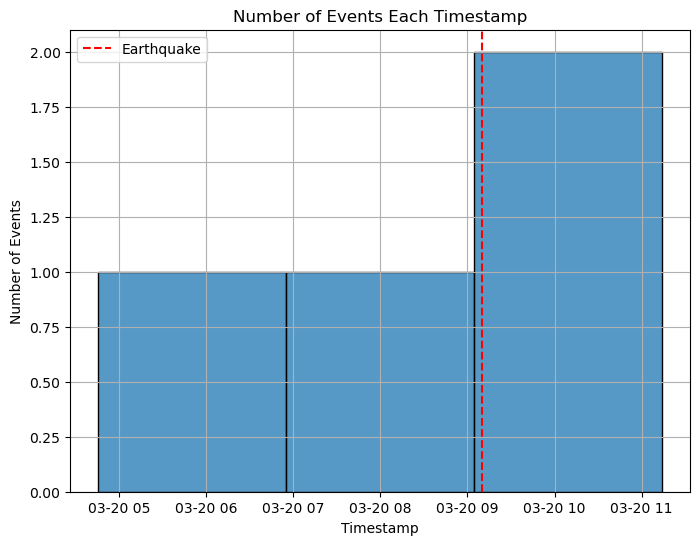

Length of subset: 3


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


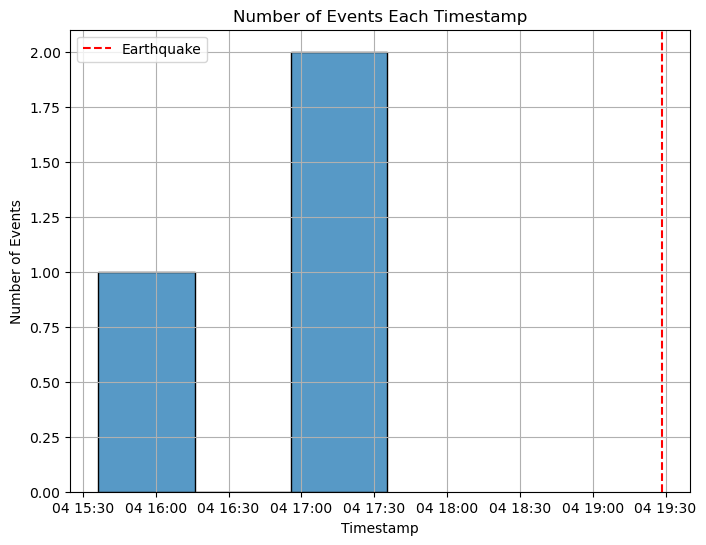

Length of subset: 3


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


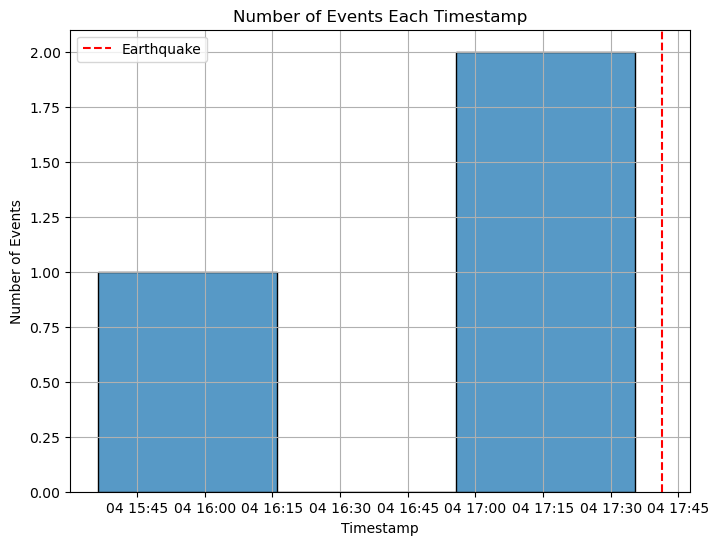

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


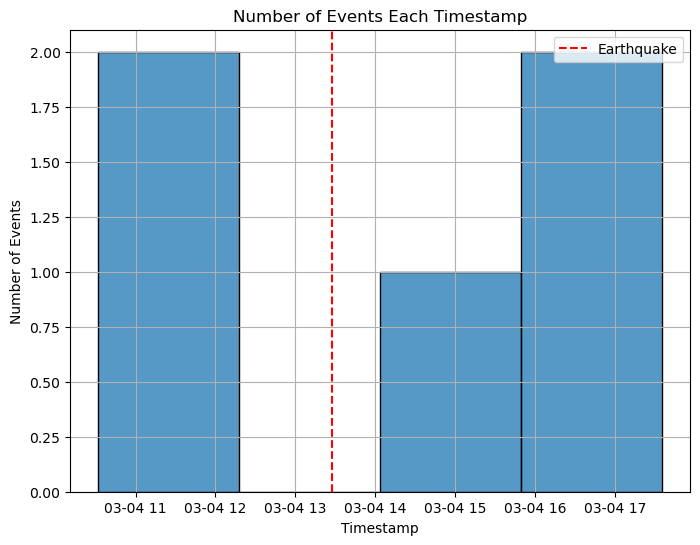

Length of subset: 13


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


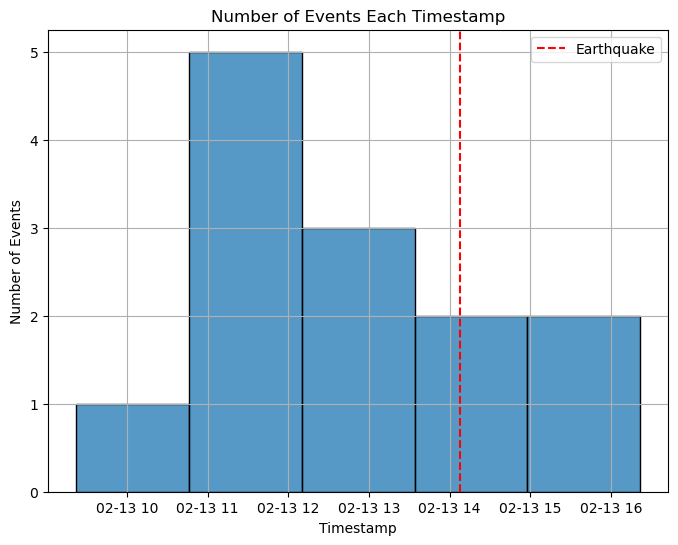

Length of subset: 9


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


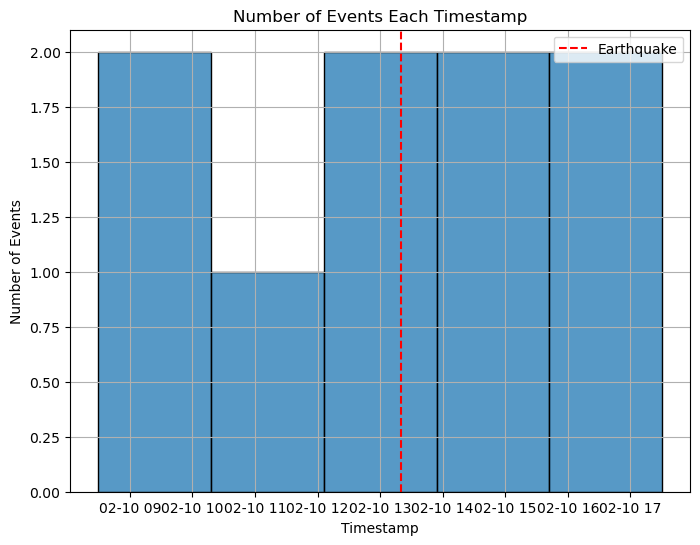

Length of subset: 9


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


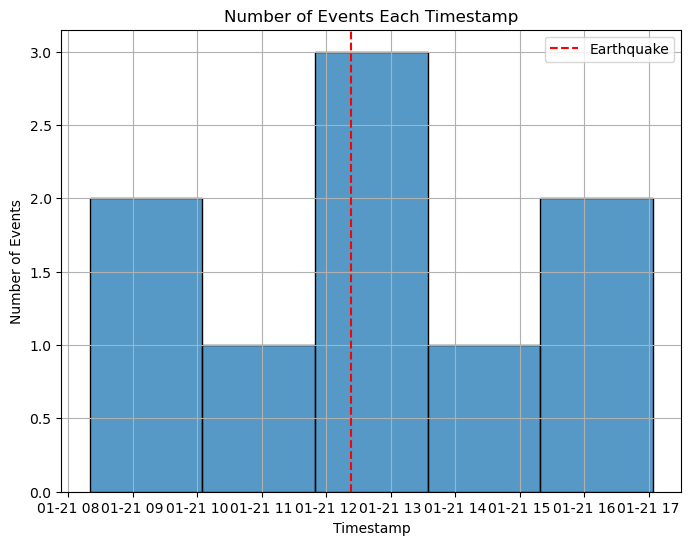

Length of subset: 9


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


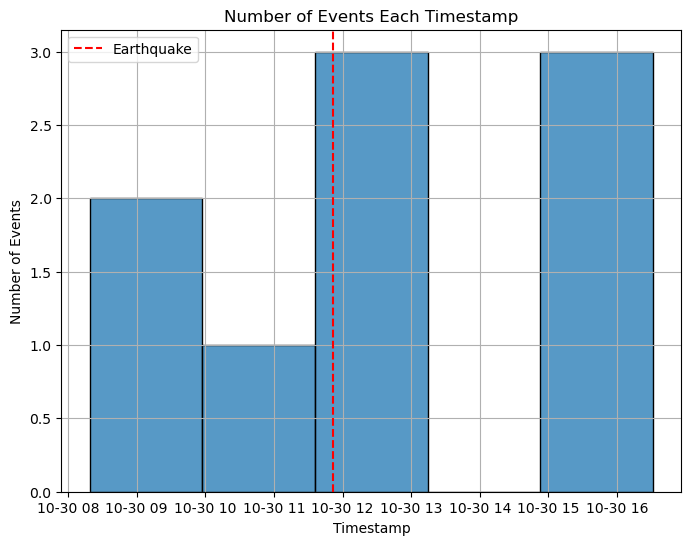

Length of subset: 8


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


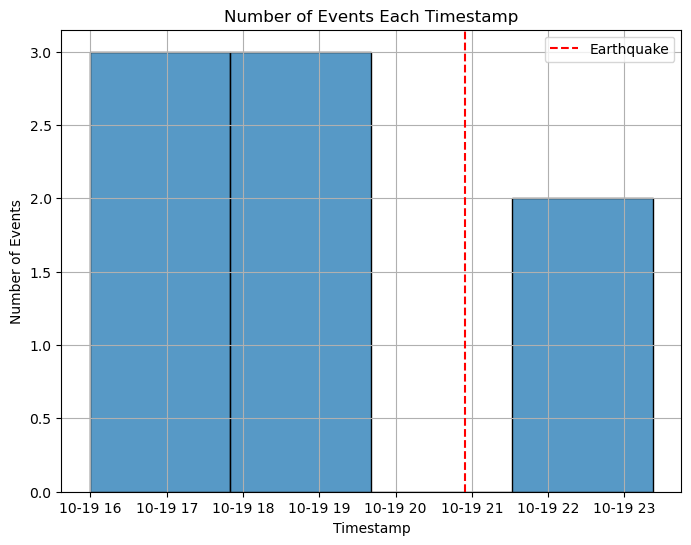

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


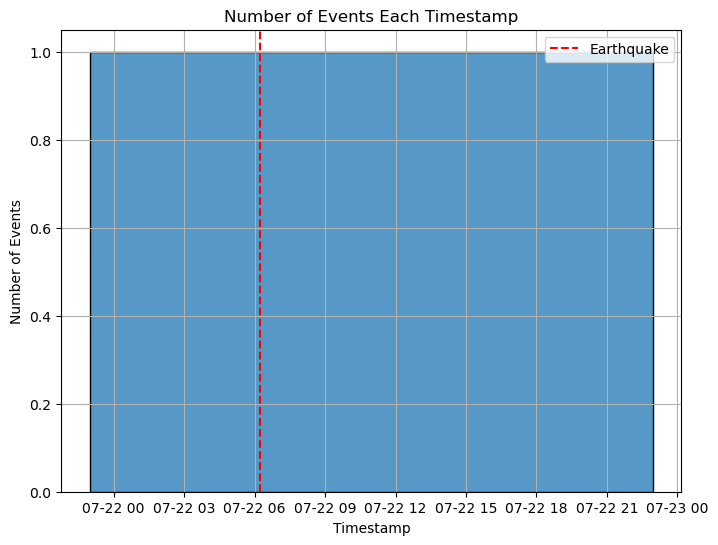

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


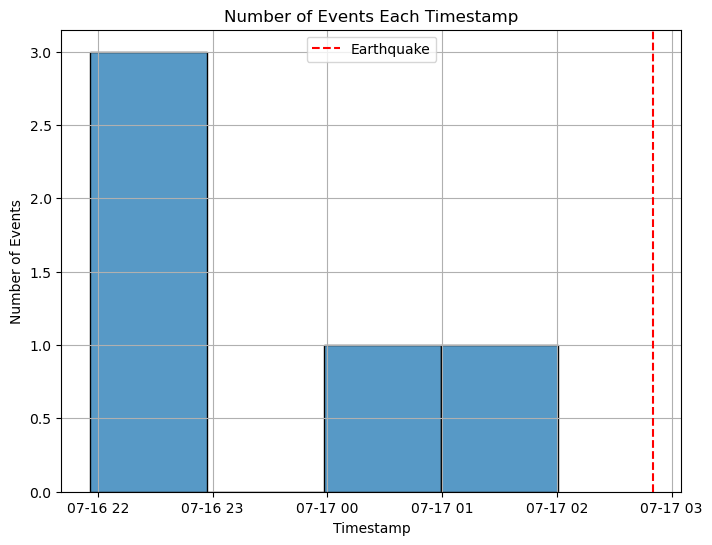

Length of subset: 6


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


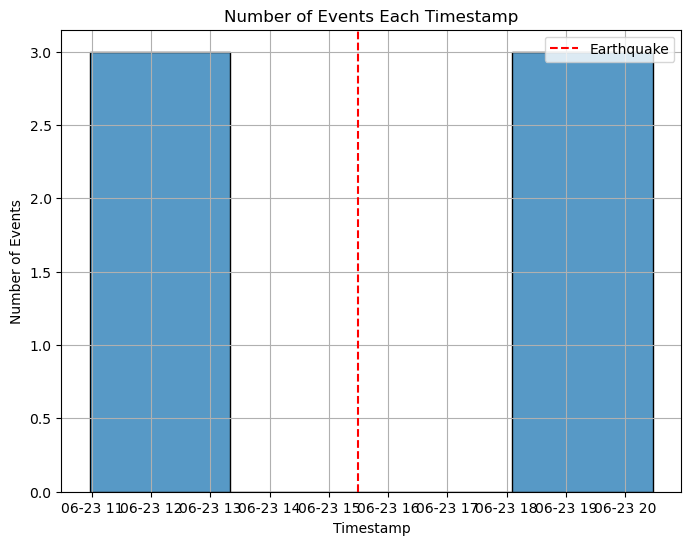

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


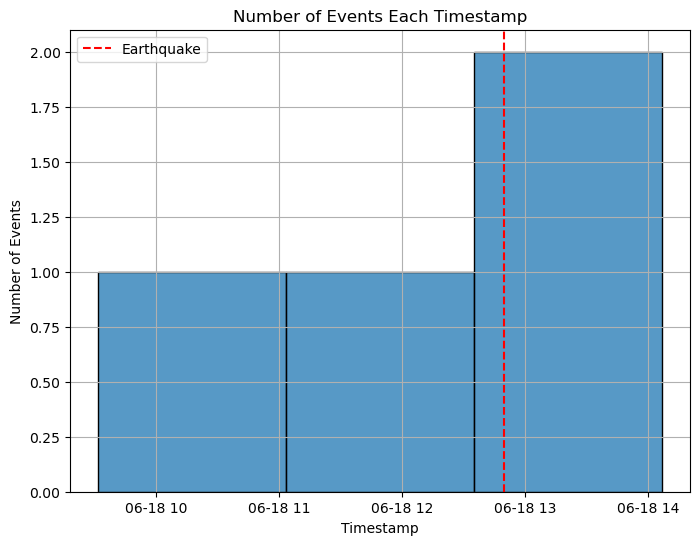

/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


Length of subset: 2


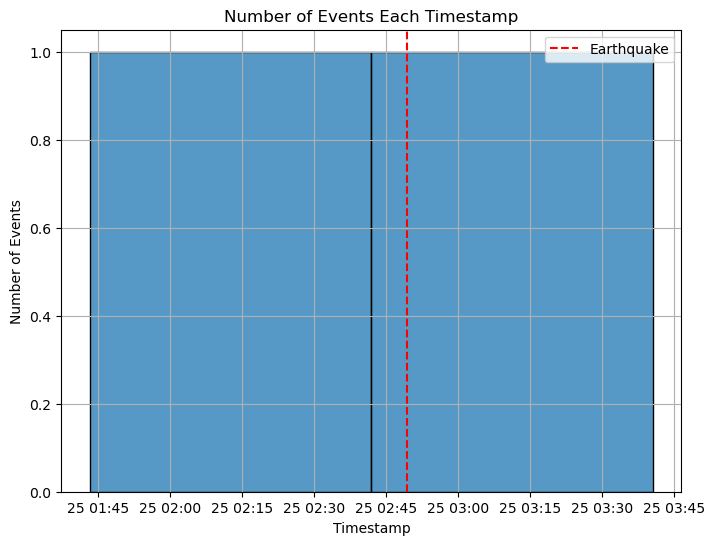

Length of subset: 0


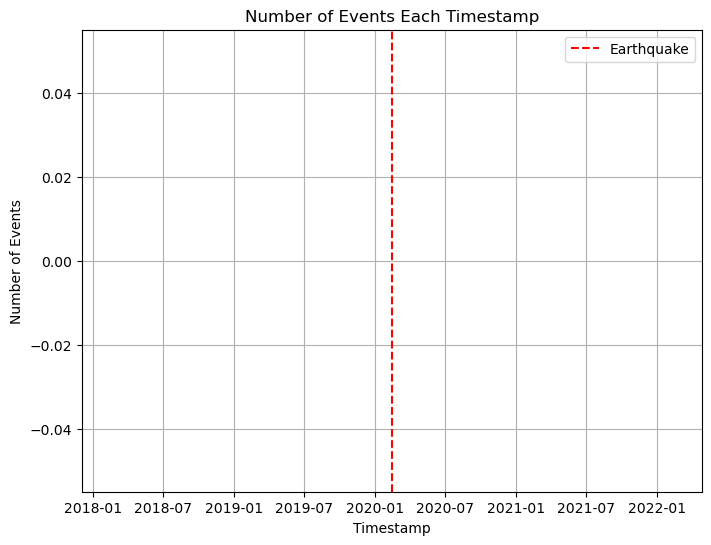

Length of subset: 3


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


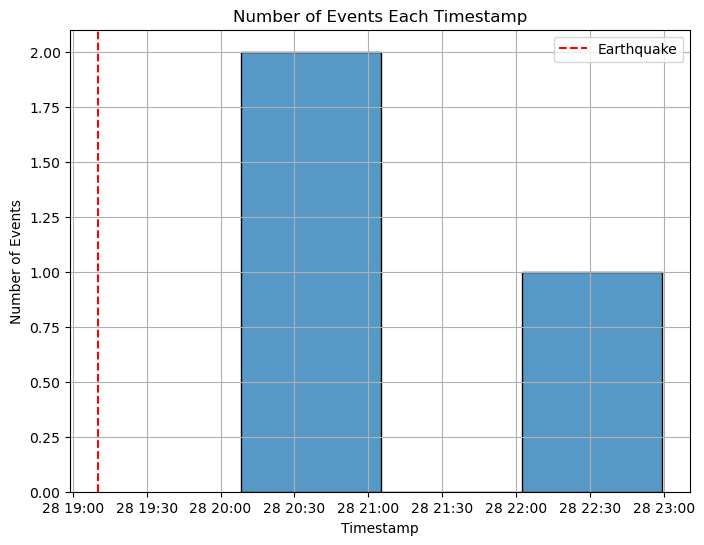

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


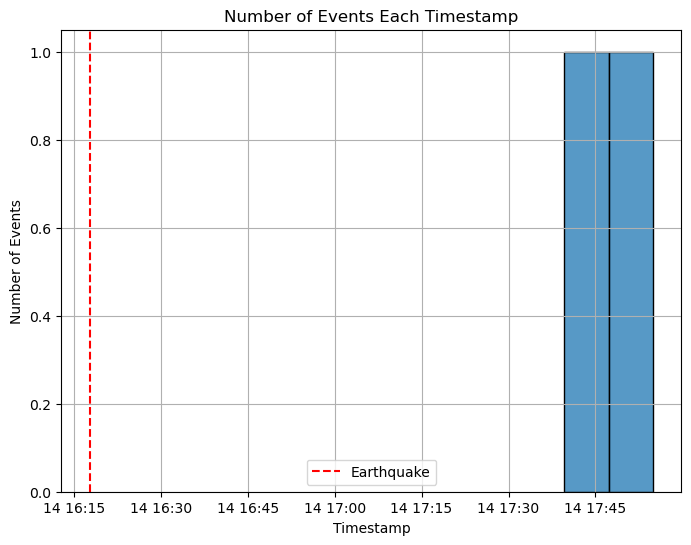

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


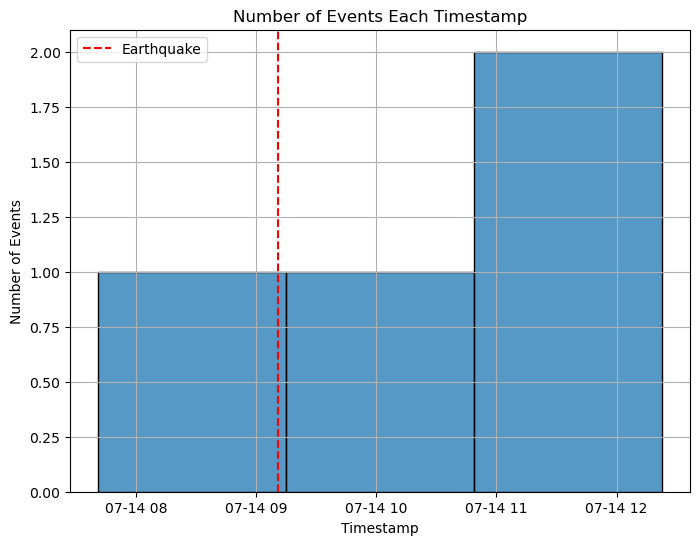

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


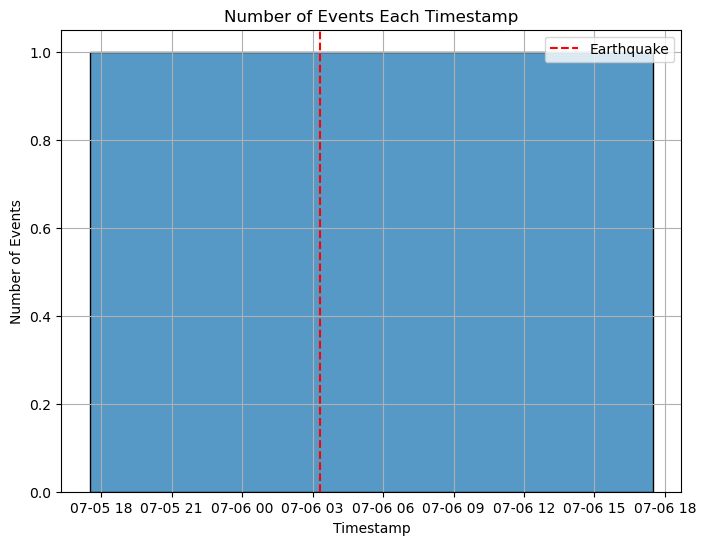

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


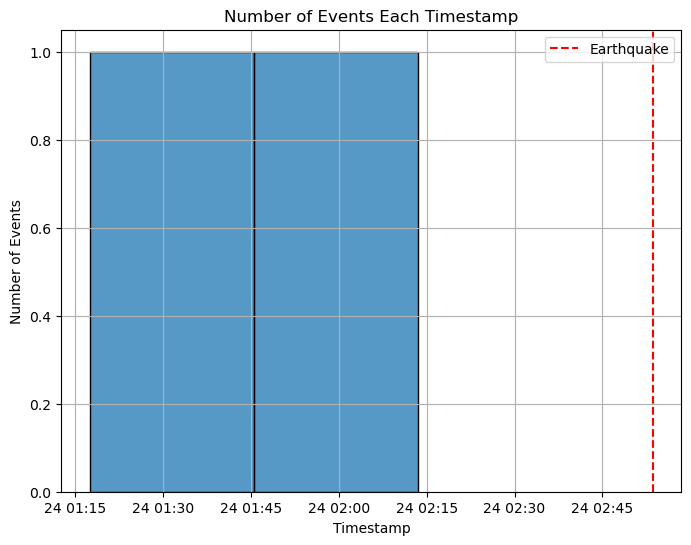

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


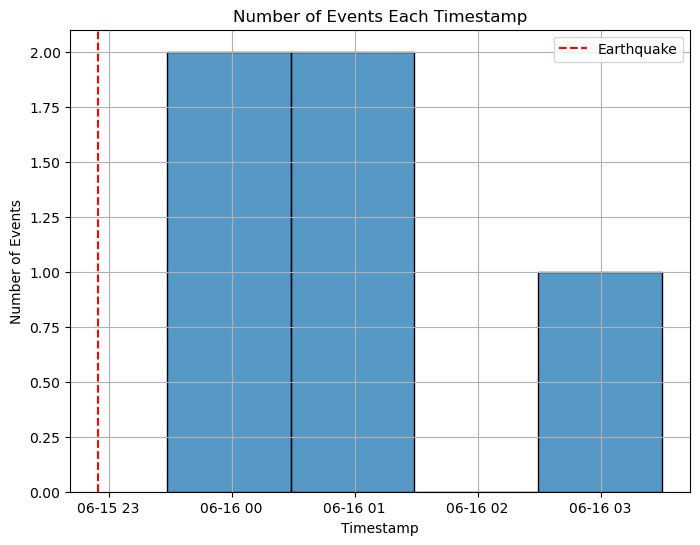

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


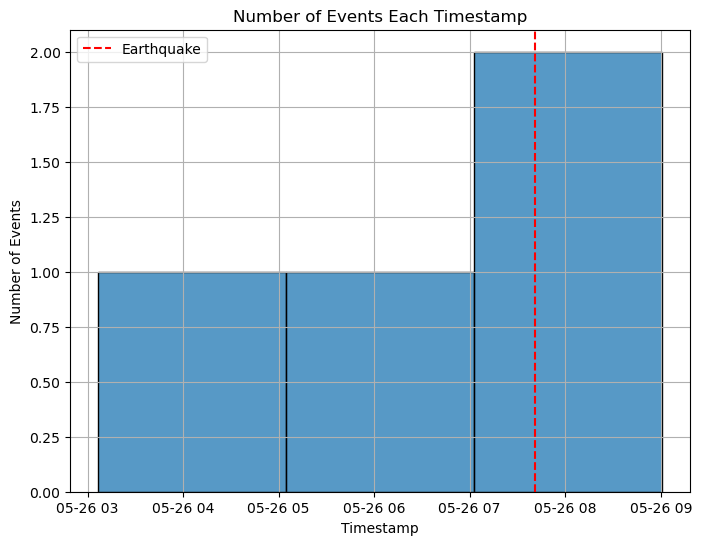

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


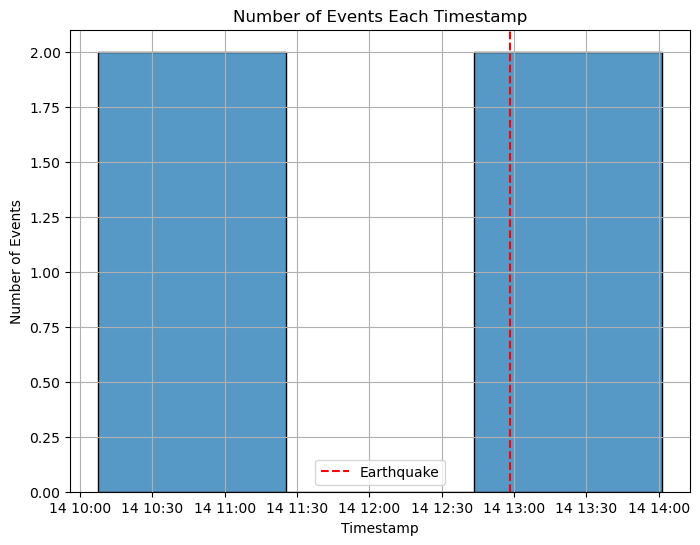

Length of subset: 3


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


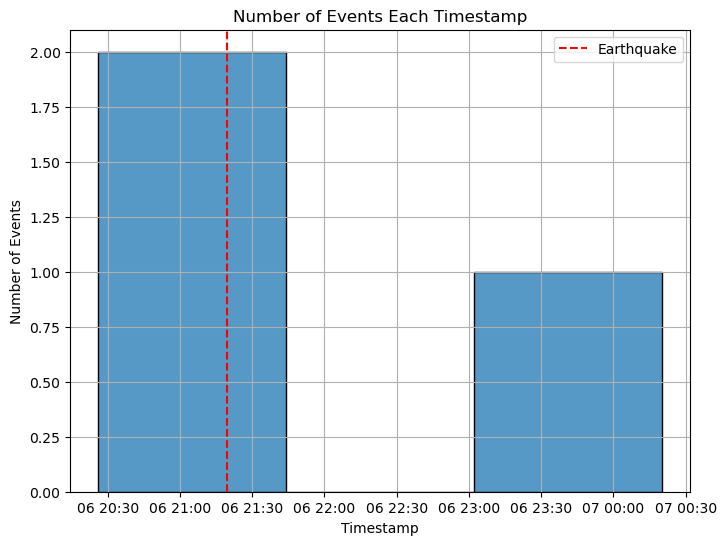

Length of subset: 9


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


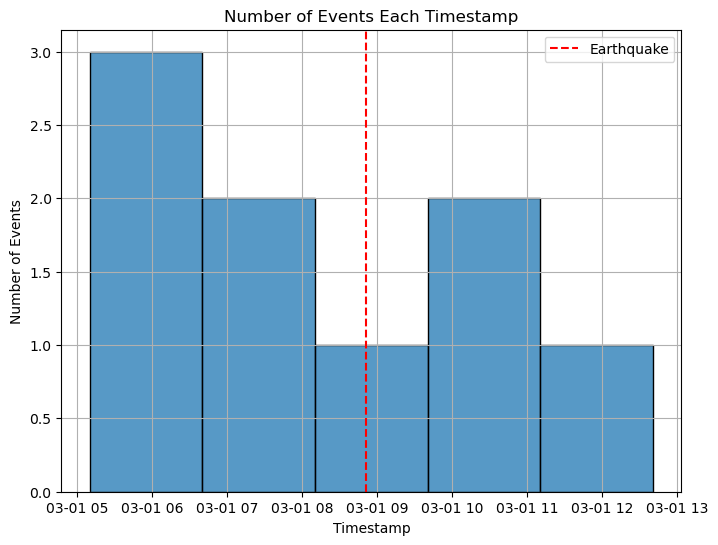

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


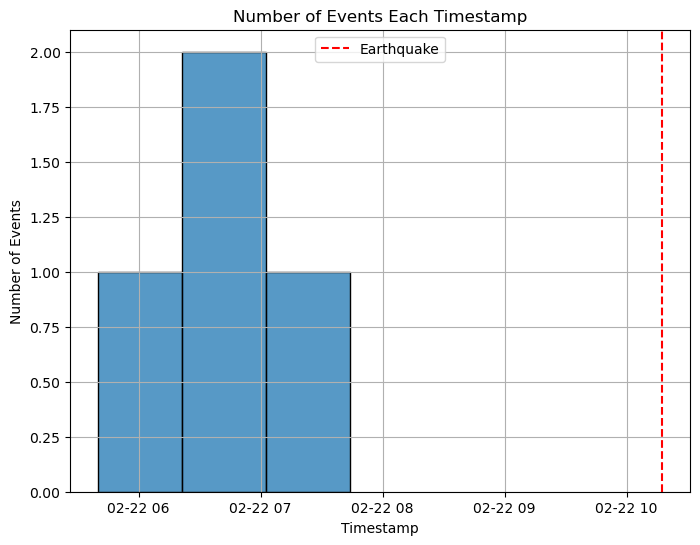

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


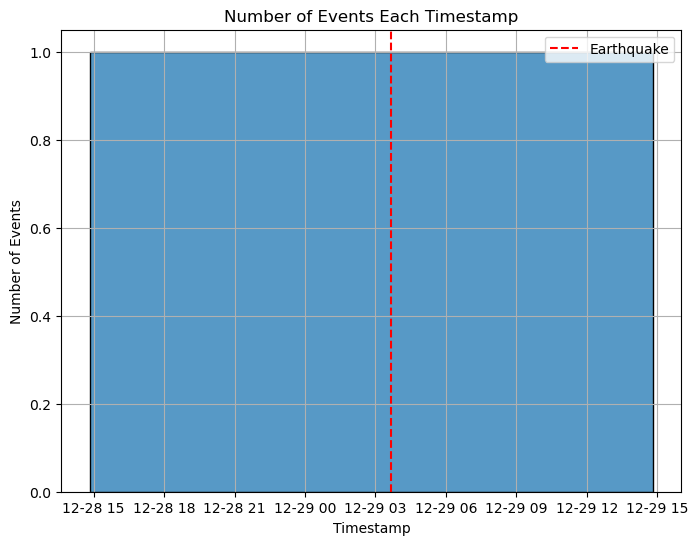

Length of subset: 7


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


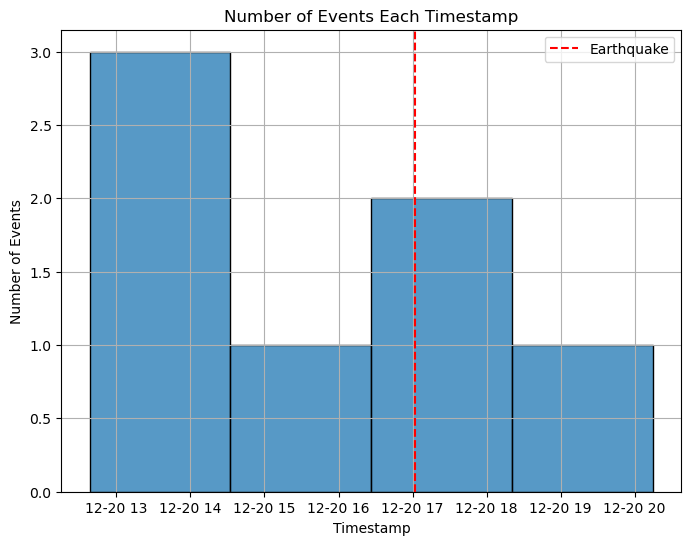

Length of subset: 0


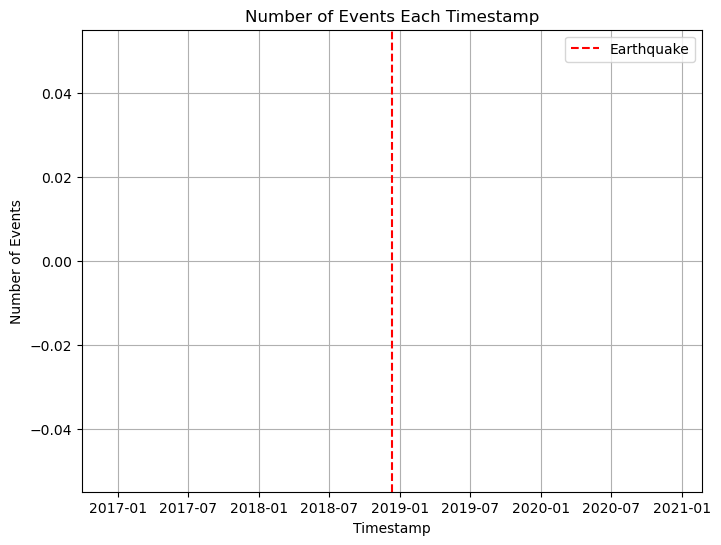

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


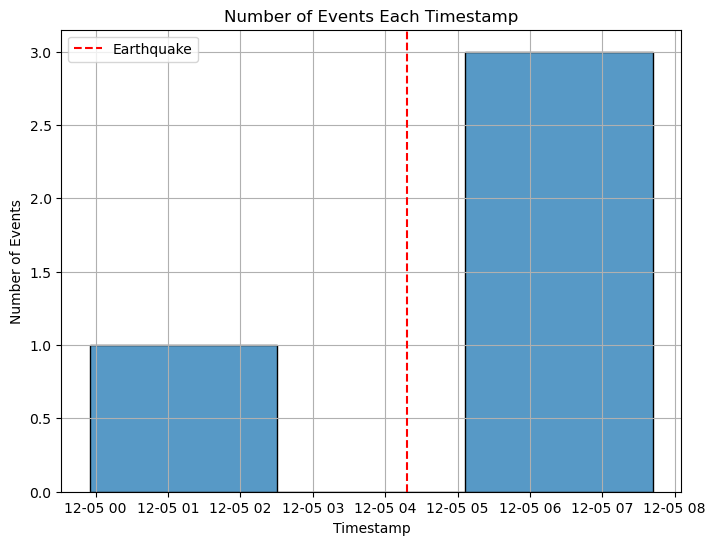

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


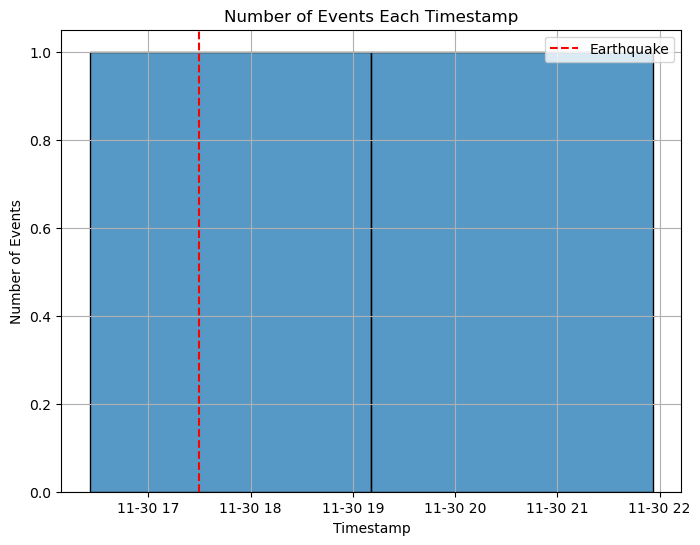

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


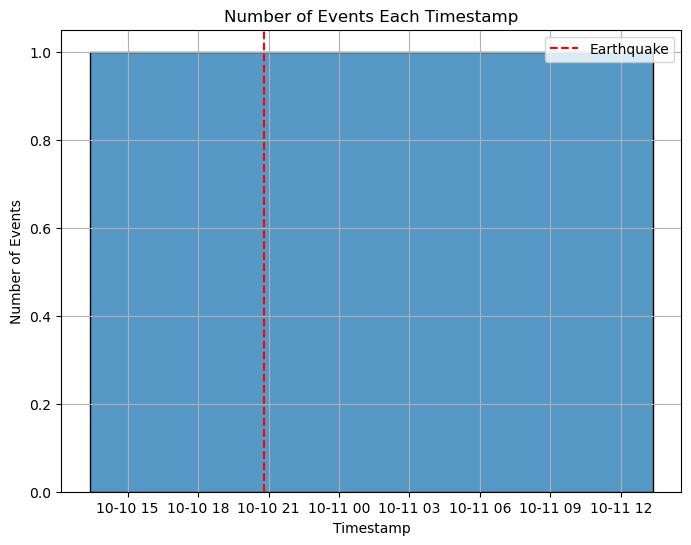

Length of subset: 0


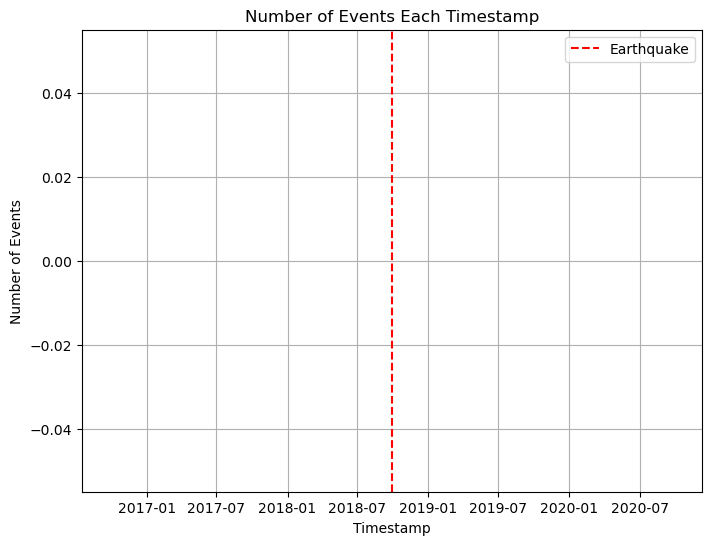

Length of subset: 3


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


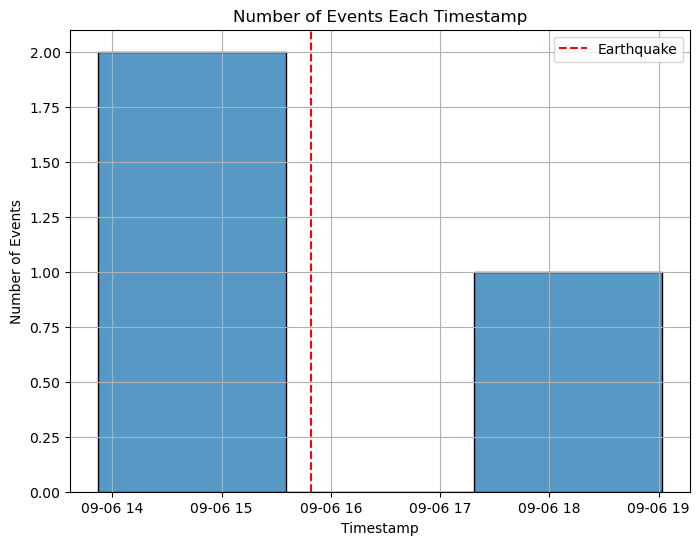

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


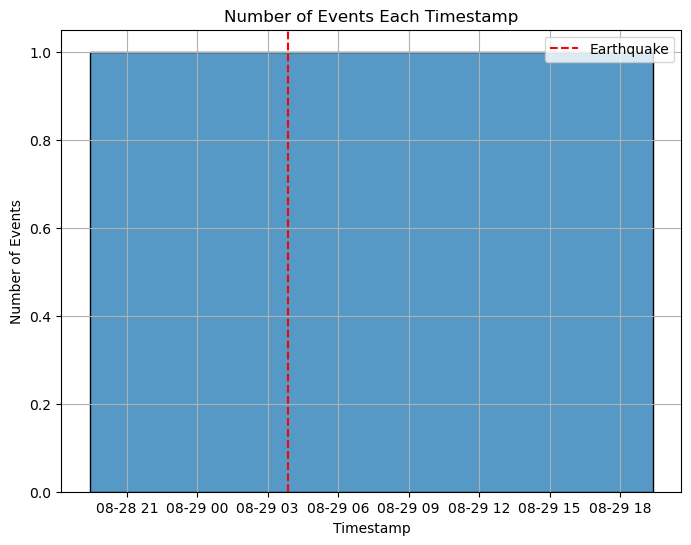

Length of subset: 3


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


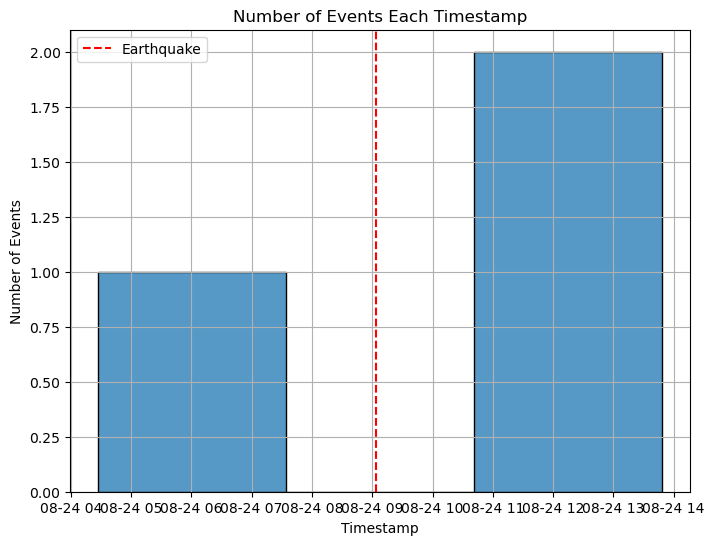

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


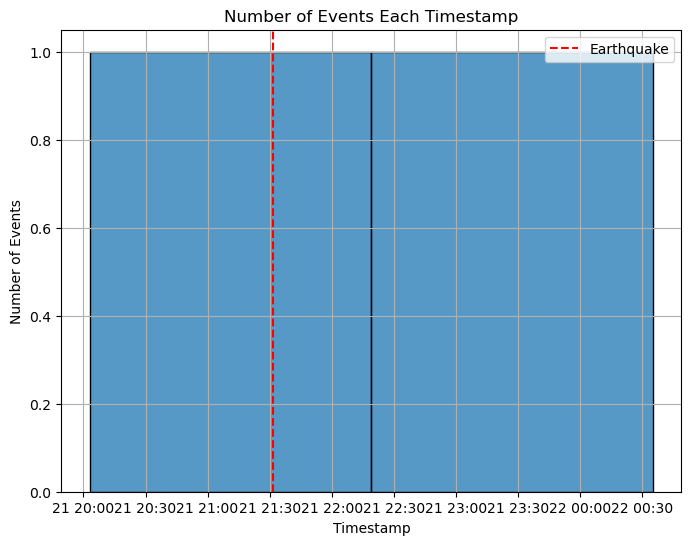

Length of subset: 0


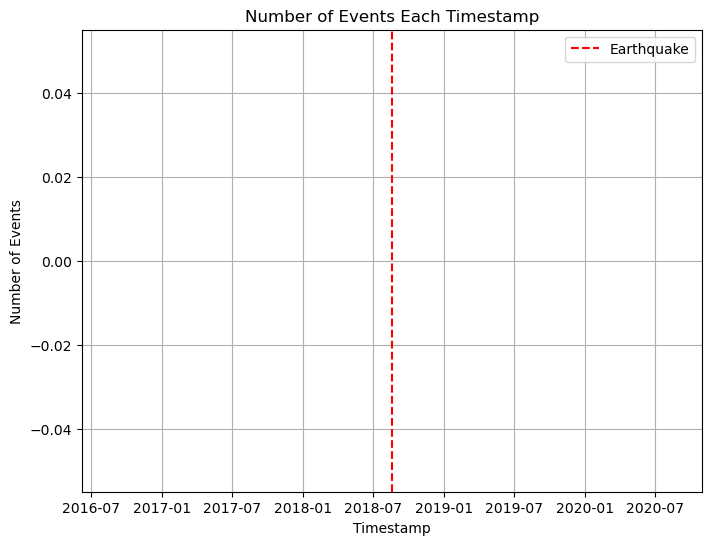

Length of subset: 4


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


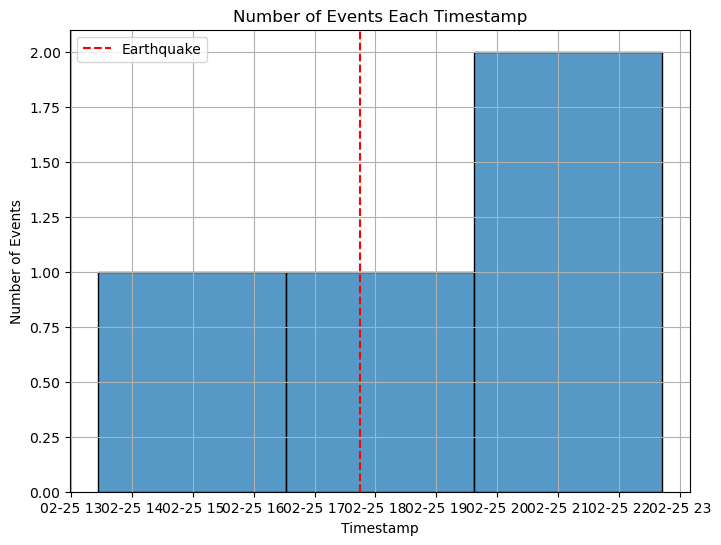

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


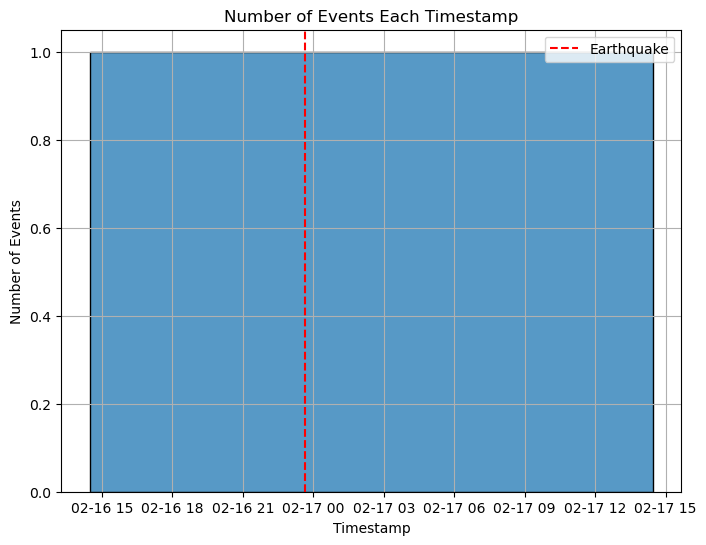

Length of subset: 15


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


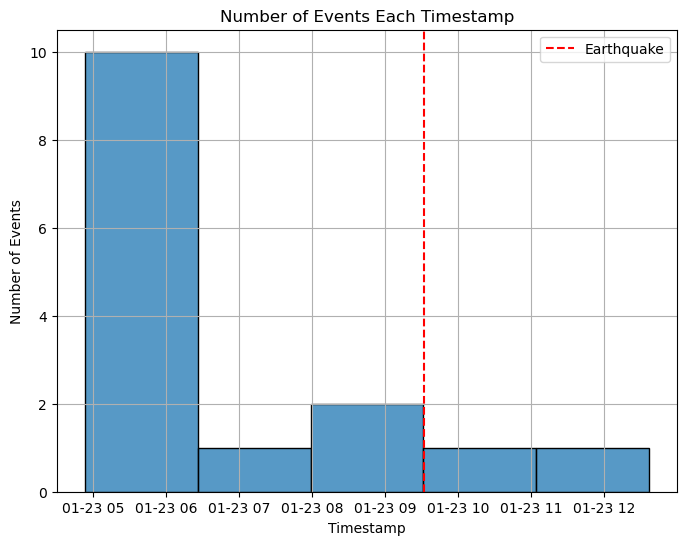

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


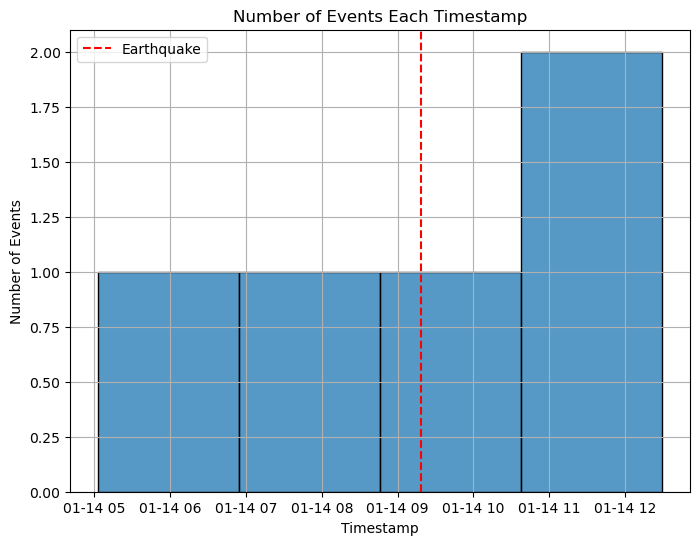

Length of subset: 9


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


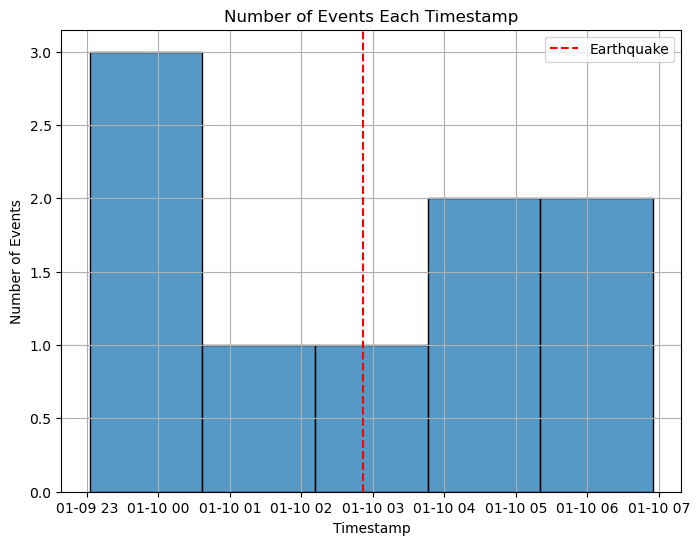

Length of subset: 5


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


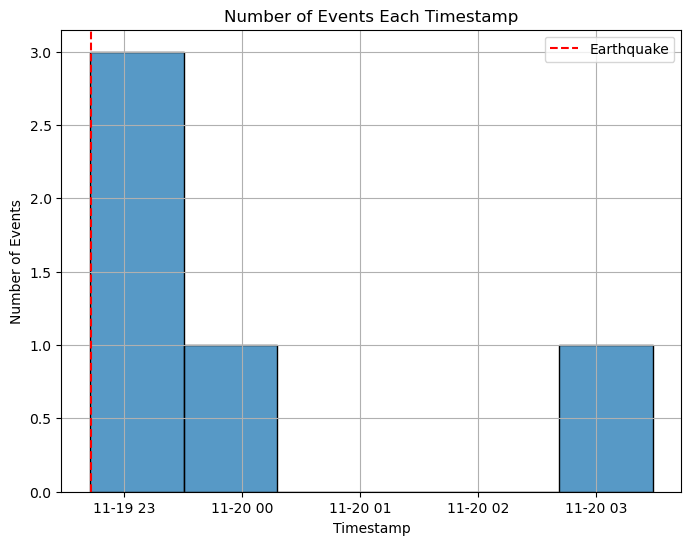

Length of subset: 2


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


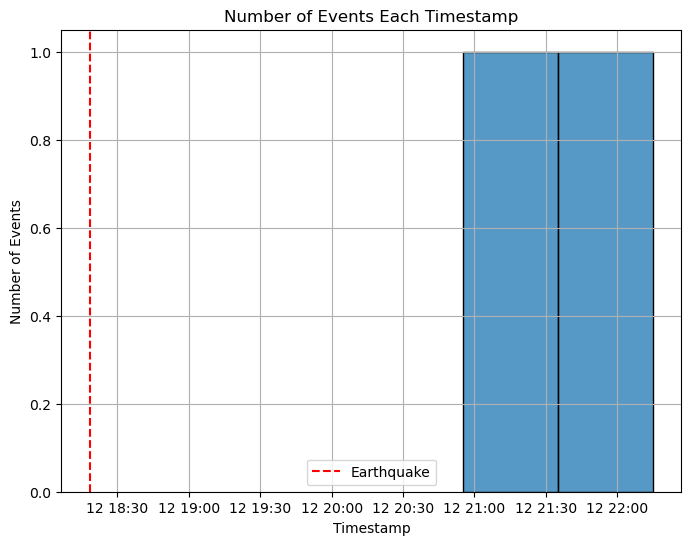

Length of subset: 0


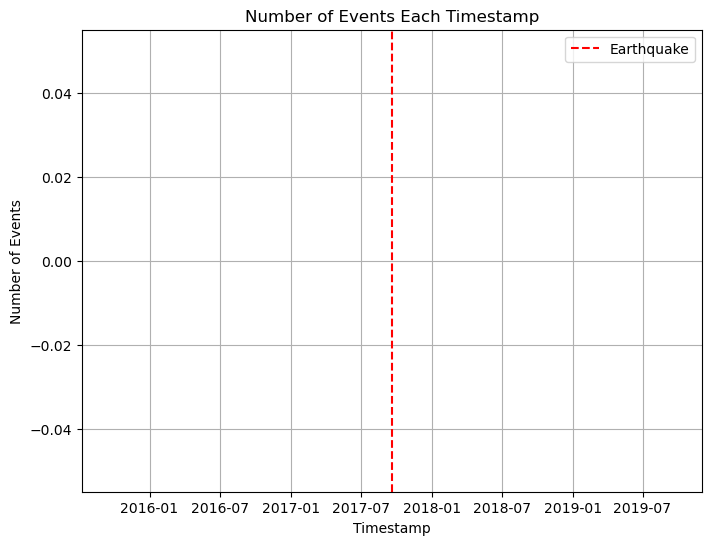

Length of subset: 0


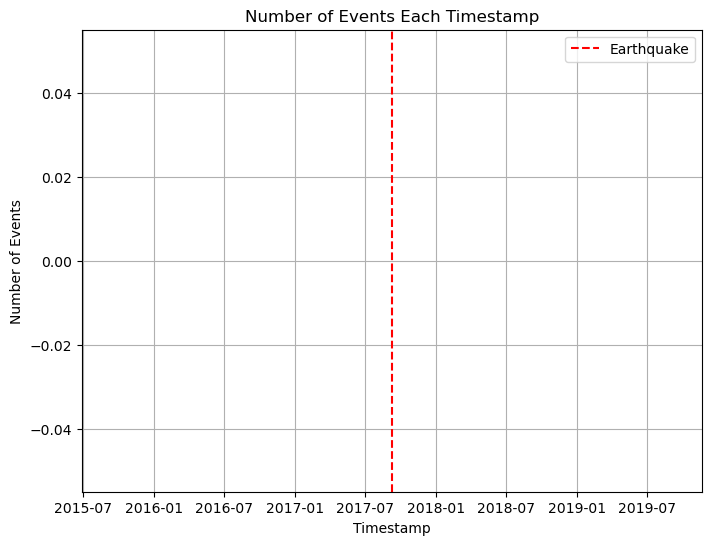

Length of subset: 0


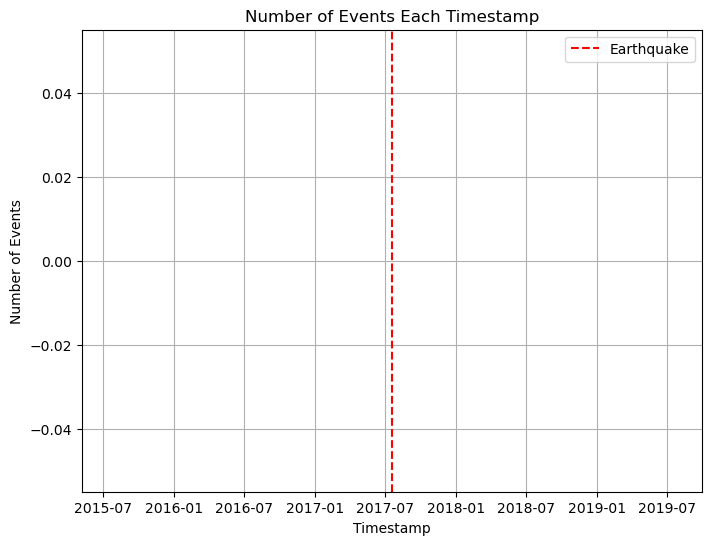

Length of subset: 0


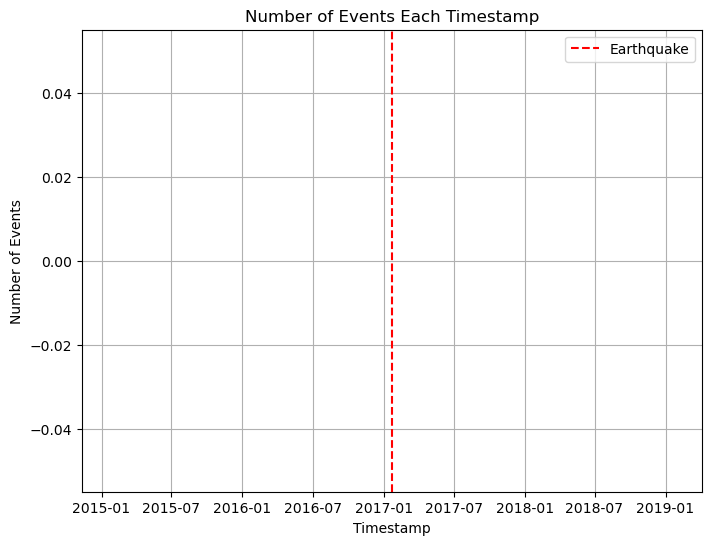

Length of subset: 1


/var/folders/3g/ljxx_82d39d9sy9wrtthx3pr0000gp/T/ipykernel_50352/2314088164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))


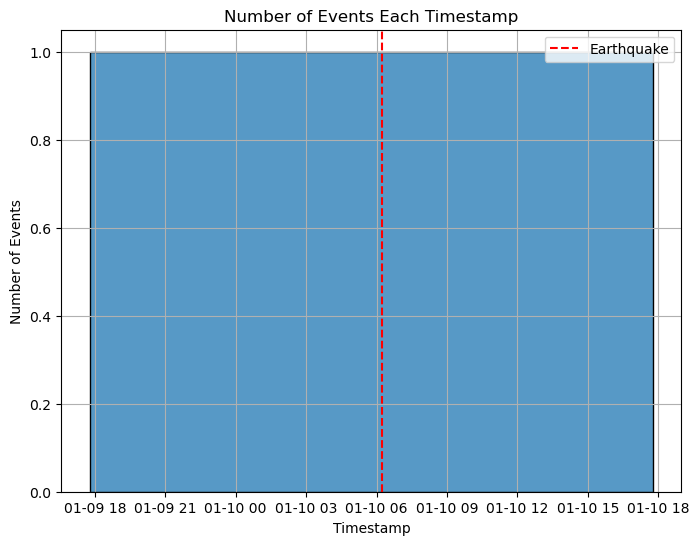

In [58]:
for i in range(len(usgs_data)):
    eq = usgs_data.iloc[i]

    eq_time = pd.to_datetime(eq['time'])
    eq_time = eq_time.tz_localize(None)  # Remove timezone awareness

    five_hours_before = eq_time - pd.Timedelta(hours=5)
    five_hours_after = eq_time + pd.Timedelta(hours=5)

    # Filter texNet_df for events within the specified time range
    texNet_subset_df = texNet_df[(texNet_df['Datetime'] >= five_hours_before) & (texNet_df['Datetime'] <= five_hours_after)]

    print('Length of subset:', len(texNet_subset_df))

    texNet_subset_df['Datetime'] = texNet_subset_df['Origin Date'] + pd.to_timedelta(texNet_subset_df['Origin Time'].dt.strftime('%H:%M:%S'))

    # Plot the number of events each timestamp
    plt.figure(figsize=(8, 6))
    sns.histplot(data=texNet_subset_df, x='Datetime')
    plt.title('Number of Events Each Timestamp')
    plt.xlabel('Timestamp')
    plt.ylabel('Number of Events')
    plt.grid(True)

    # Plot the timing of the first earthquake
    plt.axvline(x=eq_time, color='r', linestyle='--', label='Earthquake')

    plt.legend()
    plt.show()
    plt.close()